# 1. Description and EDA  
&nbsp;  
+ naver.csv
webtoons serialized in Naver Webtoon, 네이버 웹툽

id: unique id of the webtoon  
title: title of the webtoon  
author: writer of the webtoon  
genre: genre of the webtoon  
description: introduction of the webtoon  
rating: average rating out of 10 for the webtoon  
date: the most recent update date of the webtoon  
completed: completion status  
age: the recommended age  
free: free service("기다리면 무료") event availablity  
link: link of the webtoon  
&nbsp;  
+ naver_challenge.csv
webtoons in Naver best Challenge, 베스트 도전 웹툰  

id: unique id of the challenge webtoon  
title: title of the webtoon  
author: author of the webtoon(the last strings are blurred)  
summary: summary of the webtoon  
rating: rating of the webtoon  
genre: genre of the webtoon.  
format: format of the webtoon  
description: description of the webtoon  
serialize: whether this webtoon is officially being serialized on Naver (네이버 정식연재 웹툰 여부)  
potenup: chosen as the potential up(포텐업)  
&nbsp;  
출처: https://www.kaggle.com/datasets/0852b5bddaf671769494894556fee150c2bea66688548411446079f26eb2844c

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#pd.set_option('display.width', 600) 
path = os.getcwd()
data_path = os.path.join(path, 'naver_webtoon_nlp')
# 웹툰
naver = pd.read_csv(os.path.join(data_path,'naver.csv'))
# 베스트 도전 웹툰
naver_challenge = pd.read_csv(os.path.join(data_path,'naver_challenge.csv'))

In [2]:
# 웹툰
naver

,id,title,author,genre,description,rating,date,completed,age,free,link
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...
...,...,...,...,...,...,...,...,...,...,...,...
2095,675393,[드라마원작] 한번 더 해요,미티 / 구구,"스토리, 드라마",결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,9.91,2018.03.22,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2096,687921,[드라마원작] 아일랜드 2부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,9.97,2018.02.14,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2097,677536,[드라마원작] 내 ID는 ...,기맹기,"스토리, 로맨스","못생긴 얼굴에서 미인으로 새롭게 태어난 그녀, 강미래! 그런데... 어디서 본 듯 한데?",9.83,2017.12.29,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2098,678500,[드라마원작] 아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...


In [3]:
# 베스트 도전 웹툰
naver_challenge

,id,title,author,summary,rating,genre,format,description,serial,potenup,link
0,779637,예수쟁이 다이어리,ahnc****,예수쟁이의 일상,9.30,daily,에피소드,"기독교가 세상에서 제일 싫었던 사람, 어느날 예수쟁이가 되다!\r\n안티 크리스천에...",False,False,https://comic.naver.com/bestChallenge/list?tit...
1,748367,이래서 애들은,dksk****,다양한장르의 거짓말,9.89,"daily, comic",옴니버스,하숙집 꼬마를 속이는 하숙생 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
2,748498,나의 섭식장애 일기,vldk****,섭식장애이야기,9.85,daily,에피소드,섭식장애를 겪었던 나의 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
3,683018,오늘의 후기,chae****,매일 살아가는 후기,9.77,"daily, comic",에피소드,"여러분은 오늘 무슨 일이 있었나요? 매일을 살아가는 김챈의 그림일기, 오늘의 후기!...",False,False,https://comic.naver.com/bestChallenge/list?tit...
4,756652,제제와 함께,ls****,장애아이와 형제,9.73,"daily, drama",에피소드,출산도 육아도 처음인 초보맘에게 너무나 소중한 첫째 아들이 태어났고..둘째 딸의 출...,False,False,https://comic.naver.com/bestChallenge/list?tit...
...,...,...,...,...,...,...,...,...,...,...,...
3187,577683,GO! 신나고,answ****,꼬꼬마 고독한의 농구를 통한 성장 스토리,9.59,sports,스토리\n\n,열혈 고교 농구 리그가 펼쳐진다!,False,False,https://comic.naver.com/bestChallenge/list?tit...
3188,620971,모두의 추억,rayk****,2002월드컵,9.79,sports,스토리\n\n,2002월드컵! 그날의 감동을 만화로 다시 한번!,False,False,https://comic.naver.com/bestChallenge/list?tit...
3189,571253,튄공,no****,"각기 다른 문제로 제자리에 멈춰버린 네 명의 청춘들, 그들이 만나 길거리 농구대회 ...",9.79,sports,스토리\n\n,"각기 다른 문제로 제자리에 멈춰버린 네 명의 청춘들, 그들이 만나 길거리 농구대회 ...",False,False,https://comic.naver.com/bestChallenge/list?tit...
3190,341379,샌프란시스코 화랑관,uraj****,미국 정통 한국 태권도,9.83,sports,옴니버스,샌프란시스코에 있는 화랑관 태권도장에 있는 유일한 한국인 가야에게 벌어지는 이야기.,True,False,https://comic.naver.com/bestChallenge/list?tit...


## 1.1 Pre-processing the Naver Webtoon data  
Since Naver Webtoon is commercial and professional results, data from naver.csv file is main target to bed analyzed.  
At first, remove brackets; \[\], <>, (), {}, and 드라마원작이라는 단어.

In [4]:
import re
naver['title'] = naver['title'].apply(lambda x: re.sub(r"[\([{<>})\]]", "", x))
naver['title'] = naver['title'].apply(lambda x: re.sub(r"드라마원작 ", "", x))
naver['title'] = naver['title'].apply(lambda x: re.sub(r"[.-]", "", x))
naver['title'] = naver['title'].apply(lambda x: x.strip())
naver['description'] = naver['description'].apply(lambda x: re.sub(r"[\([{<>})\]]", "", x))
naver

,id,title,author,genre,description,rating,date,completed,age,free,link
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...
...,...,...,...,...,...,...,...,...,...,...,...
2095,675393,한번 더 해요,미티 / 구구,"스토리, 드라마",결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,9.91,2018.03.22,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2096,687921,아일랜드 2부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,9.97,2018.02.14,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2097,677536,내 ID는,기맹기,"스토리, 로맨스","못생긴 얼굴에서 미인으로 새롭게 태어난 그녀, 강미래! 그런데... 어디서 본 듯 한데?",9.83,2017.12.29,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2098,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...


In [5]:
ids = naver['id'].to_numpy()
titles = naver['title'].to_numpy()
descriptions = naver['description'].to_numpy()
authors = naver['author'].to_numpy()
genres = naver['genre'].to_numpy()
ratings = naver['rating'].to_numpy()
ages = naver['age'].to_numpy()
for t in titles:
    print(t)

가난을 등에 업은 소녀
가담항설
가령의 정체불명 이야기
가비지타임
가상&RPG
가슴털 로망스
가우스전자
가족같은 XX
가족의 초상
가짜 동맹
가짜인간
가타부타타
각자의 디데이
간질간질
간첩 18세
간택주의보
갇힌 방
감 비서가 고장났다
감염자
감자마을
감히
갑자기 커피
갓 오브 하이스쿨
갓!김치
갓도령스
갓물주
갓트
갓핑크
강남도깨비
강남의 기사
강림전기 개정기
강변살다
강시대소동
같은 학교 친구
같은도장
개를 낳았다
개미
개미잡이
개밥 먹는 남자
개와 사람의 시간
개인정보 제공에 동의하십니
개장수
개판
개편 축하 릴레이 카툰
갤러리L : 당신의 기억을
갸오오와 사랑꾼들
거래
거래하실래요?
거미
거상 김만덕
걸어서 30분
검은인간
게임 최강 트롤러
게임의 법칙
겟라이프
겟백
겨울 정원의 하와르
겨울동화
겨울특강
격기3반
격투기특성화사립고교 극지고
견우와 선녀
견우와 직녀
견원지간 로맨스
결계녀
결백한 사람은 없다
결혼공략
결혼까지 망상했어!
결혼생활 그림일기
경비 배두만
경비실에서 안내방송 드립니다
경운기를 탄 왕자님
경자 전성시대
계룡선녀전
고故길창덕화백 추모웹툰
고故노무현 前대통령 추
고고고
고고루키루
고교생을 환불해 주세요
고교흥신소
고등단편zip
고등매직
고래별
고백 취소도 되나?
고삼무쌍
고삼이 집나갔다
고수
고시생툰
고양이 키스
고인의 명복
고향의꽃
골든 체인지
골방환상곡
곱게 키웠더니, 짐승
공감jpg
공대생 너무만화
공방의 마녀
공복의 저녁식사
공부하기 좋은 날
공유몽
공주는 잠 못 이루고
공포단편선X
관계의 종말
관계중독
관심종자
관종교장
관찰일기
광마회귀
광장
광해의 연인
괴물공작의 딸
괴물신부
괴이
교환일기
교환학생
구구까까
구남친이 내게 반했다
구덩이
구독금지
구름의 노래
구름의 이동속도
구름이 피워낸 꽃
구사일생 로맨스
구석구석캠페인
구원자
구원자 요즘 뭐해요
구주
구주의 시간
구해줘, 호구!
국가의 탄생
국립자유경제 고등학교 세실고
국립자유경제고등학교 세실고
국세청 망나니
국왕과 성기사의 약탈혼
군인RPG
군주
굿 리스너
굿닥터
굿모닝

+ '내 ID는'은 '내 ID는 강남미인' 항목과 중복이라 삭제한다. 이때 뒷편에 나온 '내 ID는 강남미+ 인'의 index가 2097이다.  
+ '간 떨어지는'의 경우 '간 떨어지는 동거'로 뒷편에 생략된 내용을 추가한다.  
+ '쌉니다 천리마' 의 경우 생략된 내용을 추가하여 '쌉니다 천리마마트'로 고친다.  
+ '지금 우리'의 경우 생략된 내용을 추가하여 '지금 우리 학교는'으로 고친다.  

In [6]:
# 내 ID는 강남미인 중복이라 삭제 index가 2097이다.
naver = naver.drop(2097)
# 간 떨어지는 -> 간 떨어지는 동거
naver['title'] = naver['title'].apply(lambda x: re.sub(r"간 떨어지는", "간 떨어지는 동거", x))
# 쌉니다 천리마 -> 쌉니다 천리마마트
naver['title'] = naver['title'].apply(lambda x: re.sub(r"쌉니다 천리", "쌉니다 천리마마트", x))
# 지금 우리 -> 지금 우리 학교는
naver['title'] = naver['title'].apply(lambda x: re.sub(r"지금 우리", "지금 우리 학교는", x))
naver

,id,title,author,genre,description,rating,date,completed,age,free,link
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...
...,...,...,...,...,...,...,...,...,...,...,...
2094,697679,쌉니다 천리마마트,김규삼,"스토리, 개그","""고객은 왕이 아니다, 직원이 왕이다!""병맛 드라마를 뛰어넘는 미친 상상력의 원작 웹툰",9.98,2018.06.21,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...
2095,675393,한번 더 해요,미티 / 구구,"스토리, 드라마",결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,9.91,2018.03.22,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2096,687921,아일랜드 2부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,9.97,2018.02.14,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2098,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...


## 1.2. 미디어 믹스 Media  
미디어 믹스란 하나의 IP를 다른 미디어 형태로 출시하는 것을 지칭하며, 원 소스 멀티유즈라고도 합니다. 웹툰이 다른 미디어로 쓰인 정보는 나무위키의 [네이버 웹툰](https://namu.wiki/w/%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%9B%B9%ED%88%B0#toc) 항목의 17. 미디어 믹스에 나온 데이터를 토대로 정리했습니다. 'PLAY 툰'은 고유의 형식이 존재하는 여러작품들의 모임이라 제외했습니다. '여자만화 구두', '루갈'은 네이버 웹툰이 아닌데 네이버 웹툰 항목으로 잘못 올라간 작품이라 제외했습니다. '신과함께'의 경우 '신과 함께 죄와 벌', '신과 함께 인과 연' 두 편의 영화로 각색되어 별도의 항목으로 취급하였습니다. 퇴마록은 소설이 원작인 작품이라 엄밀히 구분하자면 웹툰 원작은 아니지만 추가하였습니다.   
&nbsp;  
**media 데이터 설명**  
+ media: 제작된 미디어 타입. animation, drama, sitcom(시트콤), movie로 구분  
+ title: 해당 미디어의 제목. ex) 웹툰'신과함께'를 영화화한 영화의 제목 '신과 함께 죄와 벌'    
+ original_title: 원작 웹툰의 제목 ex) 웹툰'신과함께'    
+ open(공개여부): Y는 현재 제작이 완료되어 볼 수 있는 작품. N은 현재 제작 중인 작품. 

In [7]:
media = pd.read_csv(os.path.join(data_path,'naver_webtoon_media_mix.csv'))
media = media.drop(columns=['Unnamed: 4'])
media.rename(columns={'title': 'media_title'},inplace=True)
media

,media,media_title,original_title,open(공개여부)
0,animation,와라! 편의점 (ONA),와라! 편의점,Y
1,animation,와라! 편의점 (TVA),와라! 편의점,Y
2,animation,놓지마 정신줄,놓지마 정신줄,Y
3,animation,마음의 소리,마음의소리,Y
4,animation,기기괴괴 성형수,기기괴괴,Y
...,...,...,...,...
80,movie,신과 함께 죄와 벌,신과함께,Y
81,movie,신과 함께 인과 연,신과함께,Y
82,movie,치즈인더트랩,치즈인더트랩,Y
83,movie,여중생A,여중생A,Y


### 1.2.1. naver와 media JOIN  
웹툰과 미디어 믹스 정보를 합쳐서 하나의 테이블 df를 만듭니다.

In [8]:
df = naver.merge(media, how='left',left_on='title',right_on='original_title')
df

,id,title,author,genre,description,rating,date,completed,age,free,link,media,media_title,original_title,open(공개여부)
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...,NaN,NaN,NaN,NaN
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,NaN,NaN,NaN,NaN
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...,NaN,NaN,NaN,NaN
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...,NaN,NaN,NaN,NaN
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,675393,한번 더 해요,미티 / 구구,"스토리, 드라마",결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,9.91,2018.03.22,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,고백부부,한번 더 해요,Y
2109,687921,아일랜드 2부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,9.97,2018.02.14,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,NaN,NaN,NaN,NaN
2110,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,animation,아일랜드,아일랜드 1부,N
2111,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,아일랜드,아일랜드 1부,Y


### 1.2.2. columns 정리  
중복되는 'original_title' 컬럼을 제거하고 원래 naver 파일에 있던 'title' 컬럼을 웹툰 제목으로 남겨둡니다. NaN을 빈 칸인 ''로 대체합니다. 

In [9]:
df = df.drop(columns=['original_title'])
df = df.fillna('')
df

,id,title,author,genre,description,rating,date,completed,age,free,link,media,media_title,open(공개여부)
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...,,,
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,,,
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...,,,
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...,,,
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,675393,한번 더 해요,미티 / 구구,"스토리, 드라마",결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,9.91,2018.03.22,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,고백부부,Y
2109,687921,아일랜드 2부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,9.97,2018.02.14,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,,,
2110,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,animation,아일랜드,N
2111,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,아일랜드,Y


In [10]:
ids = df['id'].to_numpy()
titles = df['title'].to_numpy()
descriptions = df['description'].to_numpy()
authors = df['author'].to_numpy()
genres = df['genre'].to_numpy()
ratings = df['rating'].to_numpy()
ages = df['age'].to_numpy()
media = df['media'].to_numpy()

### 1.2.3. 나이를 숫자로 변경  
12세 이용가의 경우 12로, 15세 이용가와 18세 이용가는 15와 18로 각각 변경합니다. 빈 칸과 전체연령가는 0으로 변경합니다.

In [11]:
np.unique(ages)

array(['', '12세 이용가', '15세 이용가', '18세 이용가', '전체연령가'], dtype=object)

In [12]:
np.unique(media)

array(['', 'animation', 'drama', 'movie', 'sitcom'], dtype=object)

In [13]:
def convert_age(age_str):
    result = 0
    if age_str:
        if age_str =='12세 이용가':
            result = 12
        elif age_str =='15세 이용가':
            result = 15
        elif age_str =='18세 이용가':
            result = 18
    return result

ages_no = []
for idx, age in enumerate(ages):
    age_no = convert_age(age)
    ages_no.append(age_no)
    
ages_no = np.array(ages_no)
ages_no

array([ 0, 12, 15, ..., 15, 15, 18])

## 1.3. Divide data
미디어 믹스가 있는 df는 df_m로, 없는 df는 df_n로 나눕니다.

In [14]:
df_m = df[~df['media'].isin([''])]
df_n = df[df['media'].isin([''])]
df_m

,id,title,author,genre,description,rating,date,completed,age,free,link,media,media_title,open(공개여부)
22,318995,갓 오브 하이스쿨,박용제,"스토리, 판타지","전국, 전세계 고등학생 중 가장 쎈 녀석을 뽑는 대회가 열린다.허구 100% 막장 ...",9.64,2022.11.03 23:00,True,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=3...,animation,갓 오브 하이스쿨,Y
73,693431,계룡선녀전,돌배,"스토리, 드라마","고려, 조선시대를 거쳐 바리스타가 된 계룡산 선녀님女, 699세환생한 서방님과 날개...",9.98,2018.03.14 23:08,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,계룡선녀전,Y
86,662774,고수,류기운 / 문정후,"스토리, 판타지",용비불패 최강의 콤비가 무협의 전설을 다시 쓰다! 천하제일의 고수 강룡. 그리고 수...,9.97,2021.05.04 23:12,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,animation,고수,N
183,679567,금수저,HD3,"스토리, 드라마",부모님을 선택할 수 있다고!?'후천적 금수저가 된 아이의 인생 어드벤처,9.94,2018.06.15 23:21,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,금수저,Y
189,557672,기기괴괴,오성대,"옴니버스, 스릴러",절벽귀 오성대 작가의 신작 옴니버스 미스테리 스릴러.기묘하고 괴상한 이야기들.,9.90,2022.06.01 22:59,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=5...,animation,기기괴괴 성형수,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,697679,쌉니다 천리마마트,김규삼,"스토리, 개그","""고객은 왕이 아니다, 직원이 왕이다!""병맛 드라마를 뛰어넘는 미친 상상력의 원작 웹툰",9.98,2018.06.21,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,쌉니다 천리마마트,Y
2108,675393,한번 더 해요,미티 / 구구,"스토리, 드라마",결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,9.91,2018.03.22,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,고백부부,Y
2110,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,animation,아일랜드,N
2111,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,아일랜드,Y


In [15]:
df_n

,id,title,author,genre,description,rating,date,completed,age,free,link,media,media_title,open(공개여부)
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...,,,
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,,,
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...,,,
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...,,,
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,784890,7아이언,태발 / 김홍태,"스토리, 드라마","사고로 오른손을 잃은 골프천재 주아이, 절망하는 시간조차 아깝다!아이는 프로가 되기...",9.69,2022.12.25 22:00,False,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...,,,
2095,703856,8월의 눈보라,김리아,"스토리, 로맨스",교복모델이었던 보라는 암흑 고3 시절을 거치며 이전의 모습은 온데간데 없다.설상가상...,9.36,2020.10.17 23:24,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...,,,
2096,792651,99강화나무몽둥이,홍실 / 지페리,"스토리, 판타지",약육강식이 진리인 가상 현실 게임 '크로노 라이프'.허접이라며 무시만 당하던 '나'...,9.81,2022.12.30 22:55,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,,,
2097,737831,9등급 뒤집기,아백,"스토리, 드라마",한번호로 찍어도 받기힘들다는 9등급을 받는 이인범공부를 못한다는 이유로 온갖 괄시를...,9.27,2021.01.14 23:24,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...,,,


# 2. EDA  
## 2.1. Age Barchart with Frequency  

Text(0, 0.5, 'Frequency')

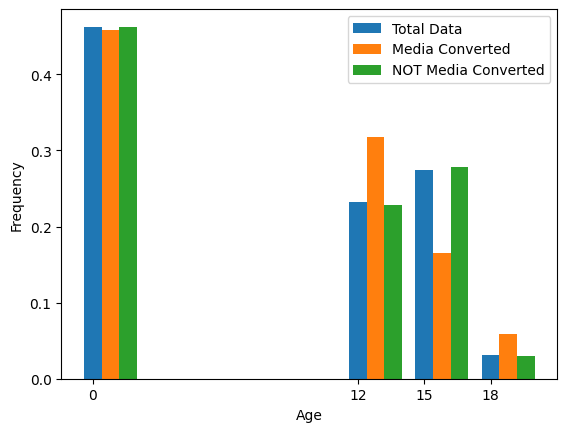

In [16]:
unique, counts = np.unique(ages_no, return_counts=True)
fig, ax = plt.subplots()
counts = counts / np.sum(counts)
ax.bar(unique, counts, alpha=1, label='Total Data')

unique, counts = np.unique(ages_no[df_m.index.to_numpy()], return_counts=True)
counts = counts / np.sum(counts)
ax.bar(unique+0.8, counts, alpha=1, label='Media Converted')

unique, counts = np.unique(ages_no[df_n.index.to_numpy()], return_counts=True)
counts = counts / np.sum(counts)
ax.bar(unique+1.6, counts, alpha=1, label='NOT Media Converted')

ax.legend(loc='upper right')
ax.set_xticks([0, 12, 15, 18])
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')


Media Converted는 미디어 믹스가 있는 웹툰 데이터 df_m이며, NOT Media Converted는 미디어 믹스가 없는 웹툰 데이터 df_n입니다. Total Data는 두 데이터를 모두 합친데이터 df다. 이는 후술할 내용들에 모두 통용되는 내용입니다.  
Barchart의 bar들을 알아보기 편리하게 하기 위해 Media Converted와 NOT Media Converted의 바들을 수평 이동시켰습니다. 따라서, x 좌표 0에 위치한 파란 bar와, 그 옆의 1을 가리키는 주황색 bar, 그 옆의 2를 가리키는 녹색 bar 모두 다른 숫자가 아닌 0을 의미합니다. 12, 15, 18 역시 마찬가지로 해석하면 됩니다. 연령의 경우 미디어 믹스가 있는 웹툰가 아닌 웹툰 모두 전체연령가 작품이 가장 많은 비중을 차지하였으며, 12세 연령가와 18세 연령가의 비중은 미디어 믹스가 있는 웹툰 데이터에서 더 높음을 알 수 있습니다. 15세 연령가의 경우 미디어 믹스가 있는 웹툰에서 비중이 낮습니다.  
&nbsp;  
## 2.2. Ratings Barchart with Frequency  

Text(0, 0.5, 'Frequency')

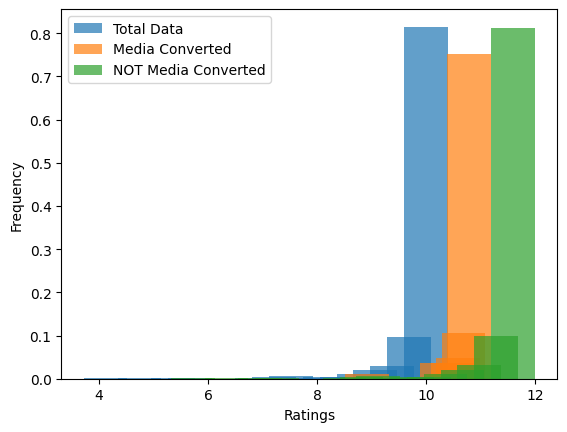

In [17]:
hist, edges = np.histogram(ratings, bins=20)
fig, ax = plt.subplots()
freq = hist / float(hist.sum())
ax.bar(edges[1:], freq, alpha=0.7, label='Total Data')

hist, edges = np.histogram(ratings[df_m.index.to_numpy()], bins=20)
freq = hist / float(hist.sum())
ax.bar(edges[1:]+0.8, freq, alpha=0.7, label='Media Converted')

hist, edges = np.histogram(ratings[df_n.index.to_numpy()], bins=20)
freq = hist / float(hist.sum())
ax.bar(edges[1:]+1.6, freq, alpha=0.7, label='NOT Media Converted')

ax.legend(loc='upper left')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')

Ratings에 대한 barchart 역시 2.2.처럼 가시성을 위해 수평이동한 결과입니다. 보통 작품의 질에 따라서 평점이 명확하게 갈리는 영화나 게임 등과는 다르게 모든 지표들이 9점대에 있음을 확인할 수 있습니다. 따라서 Ratings는 유의미한 지표라고 보기 힘듭니다.  
&nbsp;  
## 2.3. Genres Analysis

In [18]:
print('Genre:',genres)
genre1 = []
genre2 = []

for idx, genre in enumerate(genres):
    g1, g2 = genre.split(',')
    g1 = g1.strip()
    g2 = g2.strip()
    genre1.append(g1)
    genre2.append(g2)
    
genre1 = np.array(genre1)
genre2 = np.array(genre2)
unique, counts = np.unique(genre1, return_counts=True)
print('Genre1 종류:',unique)
unique, counts = np.unique(genre2, return_counts=True)
print('Genre2 종류:',unique)

Genre: ['스토리, 로맨스' '스토리, 판타지' '옴니버스, 드라마' ... '스토리, 스릴러' '스토리, 스릴러' '스토리, 스릴러']
Genre1 종류: ['스토리' '에피소드' '옴니버스']
Genre2 종류: ['감성' '개그' '드라마' '로맨스' '무협/사극' '스릴러' '스포츠' '액션' '일상' '판타지']


장르는 콤마를 이용해 2개로 구분되는데, 앞부분은 이야기 구성 방식을 의미하며 '스토리', '에피소드', '옴니버스'로 나뉜다. 뒷부분은 구체적인 장르를 의미한다. '감성', '개그', '드라마', '로맨스', '무협/사극', '스릴러', '스포츠', '액션', '일상', '판타지'가 있다.

### 2.3.1. Genre Bar Charts with Frequency

<BarContainer object of 3 artists>

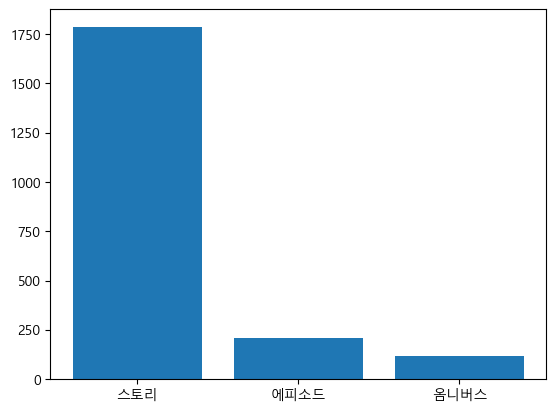

In [19]:
#matplotlib 패키지 한글 깨짐 처리 시작
plt.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
#plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝
# 출처: https://wikidocs.net/45798

unique, counts = np.unique(genre1, return_counts=True)
plt.bar(unique, counts, alpha=1, label='Total Data')

<BarContainer object of 10 artists>

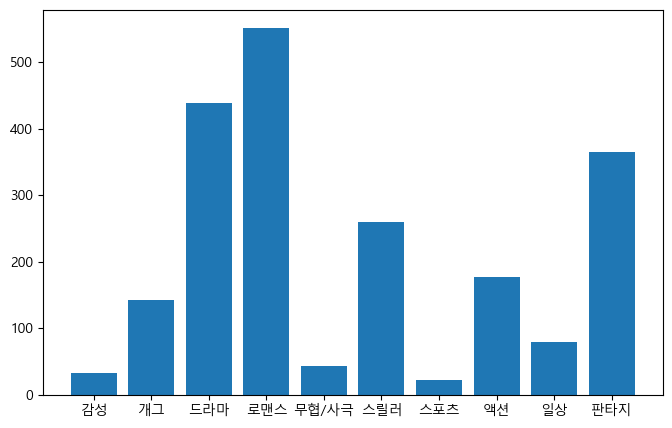

In [20]:
unique, counts = np.unique(genre2, return_counts=True)
plt.figure(figsize=(8,5))
plt.bar(unique, counts, alpha=1, label='Total Data')

### 2.3.2. Genre Wordcloud

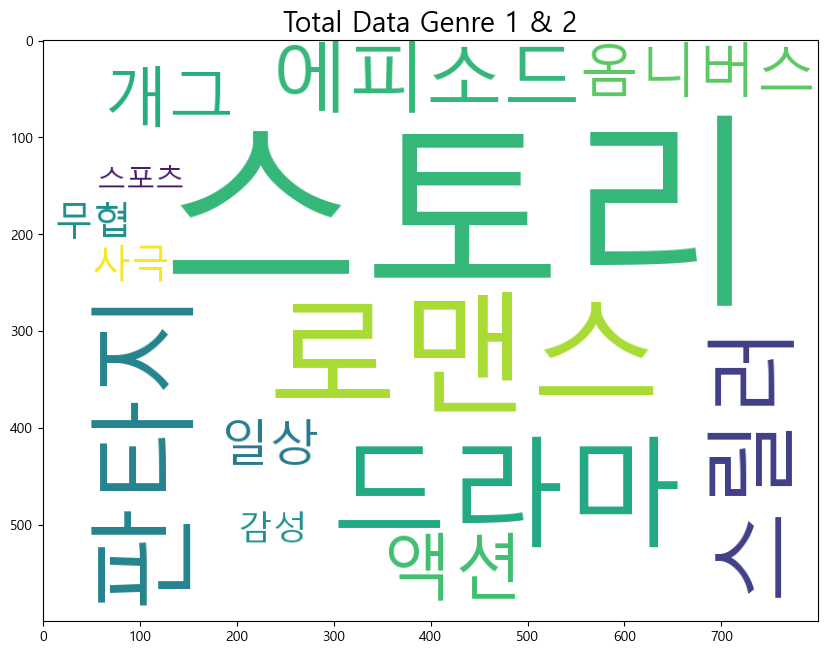

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height=600, \
                      min_font_size=10, max_words=500, collocations=False, 
                      font_path='malgun',
                      min_word_length=2)#, colormap="Greens")


wordcloud.generate(" ".join(np.concatenate([genre1, genre2])))

plt.figure(figsize=(10, 10))
plt.title("Total Data Genre 1 & 2",fontsize=20)
plt.imshow(wordcloud)
plt.show()

genre1과 genre2의 바 차트와 워드 클라우드로 해당 장르에 속한 작품의 수를 비교하여 살펴보면 이야기 구성 방식은 스토리가 압도적으로 많고, 에피소드가 2위이며 옴니버스는 에피소드의 절반 정도의 크기다. 장르의 경우 로맨스가 가장 많으며, 2위는 드라마, 3위는 판타지, 4위는 스릴러, 5위는 액션이다. 감성, 무협/사극, 스포츠는 하위권을 차지했다. 

### 2.3.3. Genre 세부 분석

In [22]:
df['genre1'] = genre1
df['genre2'] = genre2
df.groupby(['genre1', 'genre2']).title.count()

genre1  genre2
스토리     감성         19
        개그         69
        드라마       373
        로맨스       524
        무협/사극      40
        스릴러       221
        스포츠        20
        액션        168
        일상          8
        판타지       344
에피소드    감성         13
        개그         56
        드라마        36
        로맨스        21
        무협/사극       2
        스릴러         9
        스포츠         2
        액션          9
        일상         56
        판타지         7
옴니버스    감성          1
        개그         18
        드라마        29
        로맨스         6
        무협/사극       1
        스릴러        30
        스포츠         1
        일상         16
        판타지        14
Name: title, dtype: int64

이야기 구성 방식에 따른 상위 다섯 장르를 살펴보고자 합니다. 구성 방식이 스토리인 경우 로맨스가 가장 많고, 순서대로 드라마, 판타지, 스릴러, 액션이 많습니다. 구성 방식이 에피소드인 경우 개그와 일상이 공동 1위이며, 드라마, 로맨스, 감성이 그 다음을 차지합니다. 옴니버스 구성 방식의 경우 스릴러가 가장 많으며 그 다음이 드라마, 개그, 일상, 판타지다. 드라마 장르는 포괄적이기 때문에 모든 이야기 방식에서 상위권을 차지하고 있습니다. 드라마를 제외하면, 스토리의 경우 로맨스, 판타지, 스릴러, 액션 장르가 많으며, 에피소드인 경우 개그, 일상, 로맨스, 감성이 수위권입니다. 옴니버스의 경우 스릴러, 개그, 일상, 판타지가 수위권입니다.  

#### 2.3.3.1. Genre 1 분석

Text(0.5, 1.0, 'Media Converted, Genre 1')

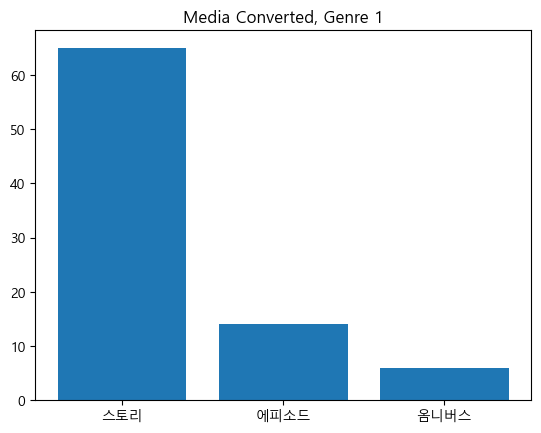

In [23]:
unique, counts = np.unique(genre1[df_m.index.to_numpy()], return_counts=True)
plt.bar(unique, counts, alpha=1)
plt.title('Media Converted, Genre 1')

Text(0.5, 1.0, 'NOT Media Converted, Genre 1')

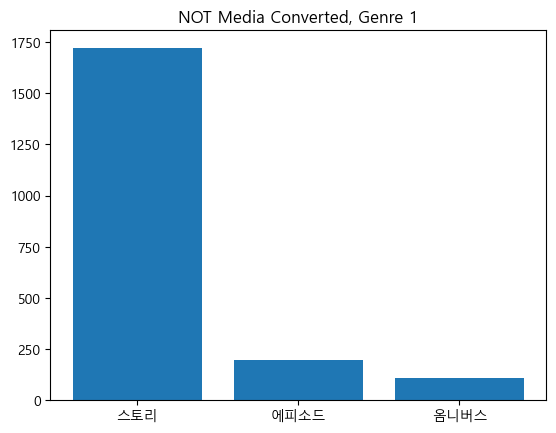

In [24]:
unique, counts = np.unique(genre1[df_n.index.to_numpy()], return_counts=True)
plt.bar(unique, counts, alpha=1)
plt.title('NOT Media Converted, Genre 1')

미디어 믹스가 존재하는 웹툰과 아닌 웹툰의 이야기 구성 방식의 분포의 차이는 유의미하다고 보기 힘듭니다.  
&nbsp;  
#### 2.3.3.2. Genre 2 분석

Text(0.5, 1.0, 'Media Converted, Genre 2')

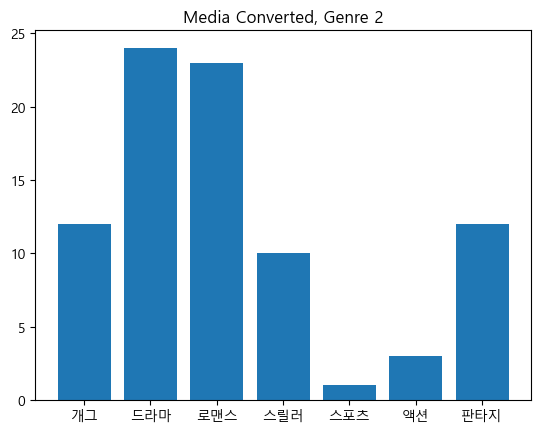

In [25]:
unique, counts = np.unique(genre2[df_m.index.to_numpy()], return_counts=True)
plt.bar(unique, counts, alpha=1)
plt.title('Media Converted, Genre 2')

Text(0.5, 1.0, 'NOT Media Converted, Genre 2')

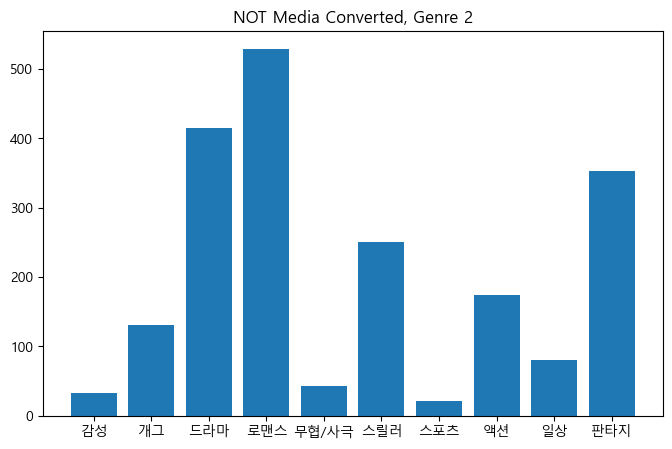

In [26]:
unique, counts = np.unique(genre2[df_n.index.to_numpy()], return_counts=True)
plt.figure(figsize=(8, 5))
plt.bar(unique, counts, alpha=1)
plt.title('NOT Media Converted, Genre 2')

미디어 믹스가 만들어진 웹툰의 경우 가장 많은 수를 차지하는 로맨스가 아닌 드라마 장르가 가장 많습니다. 근소한 차이로 로맨스 장르가 2위를 차지했습니다. 개그, 스릴러, 판타지가 그 다음 순위를 차지합니다. Total Data의 분포와 비교할 경우, 개그는 상대적으로 더 많은 수의 웹툰이 드라마화 되고 판타지는 상대적으로 더 적은 수의 웹툰이 드라마화 됨을 알 수 있습니다. 미디어 믹스가 없는 웹툰의 장르 분포는 Total Data의 분포와 거의 같습니다.

### 2.3.4 Media 별 Genre 분석

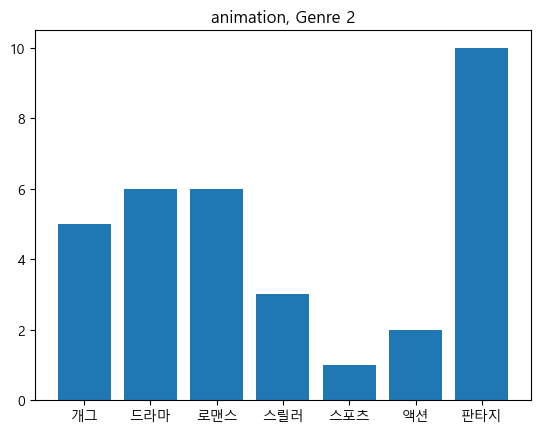

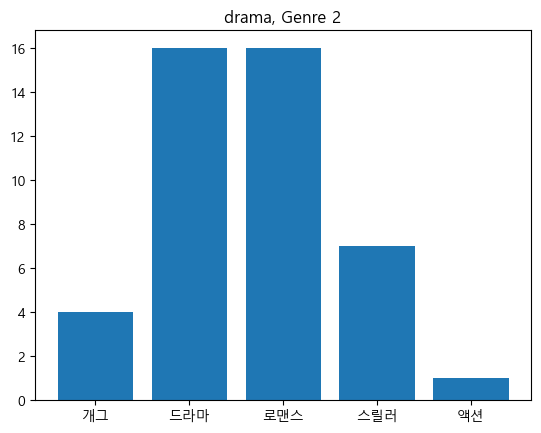

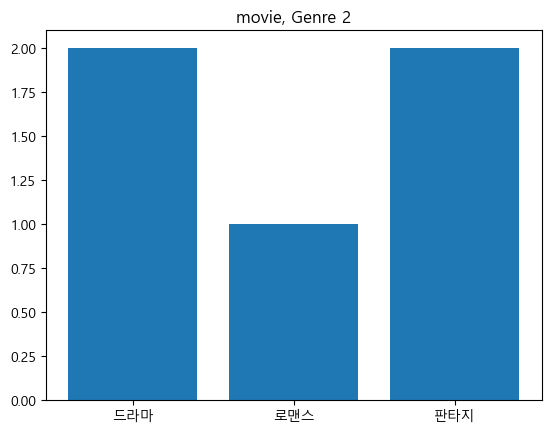

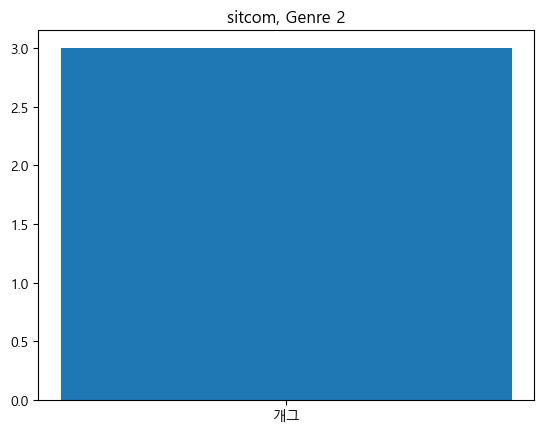

In [27]:
# media 별로 장르 분석

media_types = ['animation', 'drama', 'movie', 'sitcom']
for m_type in media_types:
    temp_df_m = df_m[df_m['media']==m_type]
    unique, counts = np.unique(genre2[temp_df_m .index.to_numpy()], return_counts=True)
    fig, ax = plt.subplots()
    ax.bar(unique, counts, alpha=1)
    ax.set_title('{0}, Genre 2'.format(m_type))
    

애니메이션은 판타지가 압도적으로 1위를 차지했으며, 그 다음이 로맨스, 드라마, 개그, 5위는 스릴러 장르가 차지했습니다. 드라마의 경우 드라마와 로맨스 장르가 가장 많으며 스릴러가 3위, 개그와 액션이 각각 4위, 5위입니다. 영화의 경우 총 5편으로 판타지 2편, 드라마 2편, 로맨스 1편입니다. 시트콤은 3편 모두 개그 장르입니다. 시트콤 (sitcom)은 짧은 시간의 코미디 장르 드라마로, 숫자가 적고 미디어 타입 drama의 하위 장르이므로 분석에 있어서의 오버피팅을 방지하고자 drama에 포함시킵니다. 시트콤을 드라마의 하위 장르로 보고 drama라는 미디어 종류로 모두 합칠 경우, 개그가 7편이 되어 4위에서 공동 3위로 올라갑니다.  
웹툰의 경우 판타지가 로맨스, 드라마 장르에 이어 3번째로 많이 생산되는 인기 장르지만 미디어 믹스에서 애니메이션으로 주로 제작되고, 최근 넷플릭스 등으로 인해 주목 받는 미디어 형태인 드라마로는 제작되지 않는 점이 특이한 사항입니다. 이는 판타지의 경우 특수분장이나 CG 등이 많이 사용되어 제작비가 높기 때문이거나, 판타지는 주로 가상의 서구권을 바탕으로 하기 때문에 배우의 캐스팅 등이 어려워 원활한 제작이 어렵기 때문이라고 추론할 수 있습니다.  

In [28]:
for idx, m in enumerate(media):
    if m == 'sitcom':
        print(m)
        media[idx]='drama'

sitcom
sitcom
sitcom


In [29]:
media

array(['', '', '', ..., 'animation', 'drama', 'drama'], dtype=object)

In [30]:
df['media']=media
df_m = df[~df['media'].isin([''])]
df_n = df[df['media'].isin([''])]

In [31]:
df['media'].value_counts()

             2028
drama          47
animation      33
movie           5
Name: media, dtype: int64

In [32]:
df_m['media'].value_counts()

drama        47
animation    33
movie         5
Name: media, dtype: int64

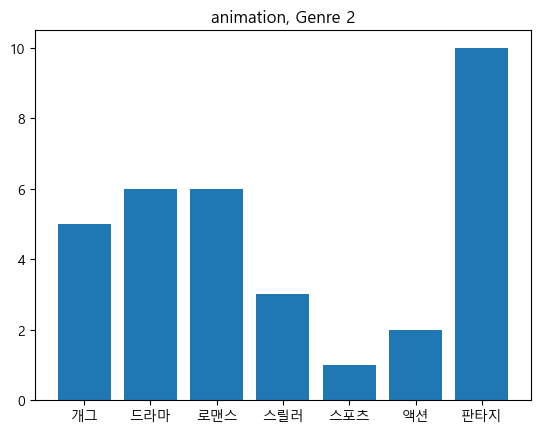

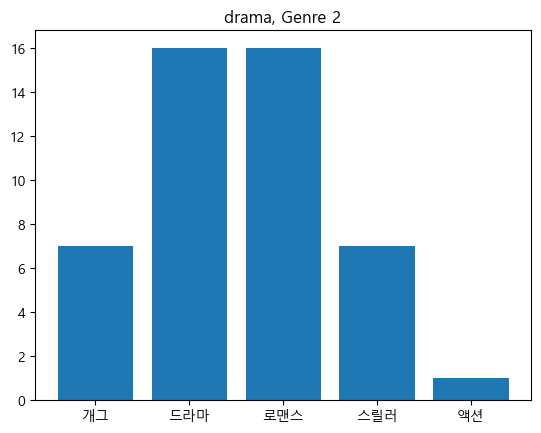

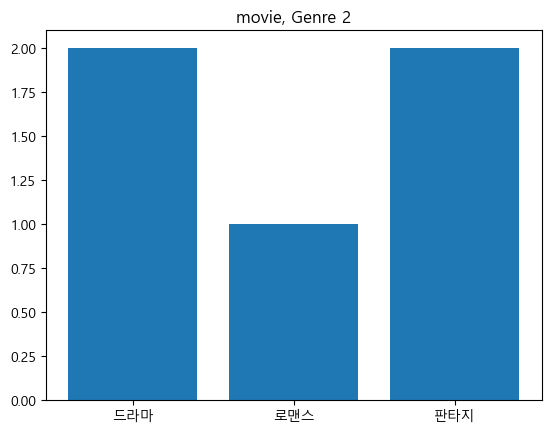

In [33]:
# media 별로 장르 분석

media_types = ['animation', 'drama', 'movie']
for m_type in media_types:
    temp_df_m = df_m[df_m['media']==m_type]
    unique, counts = np.unique(genre2[temp_df_m .index.to_numpy()], return_counts=True)
    fig, ax = plt.subplots()
    ax.bar(unique, counts, alpha=1)
    ax.set_title('{0}, Genre 2'.format(m_type))
    

# 3. Hypothesis and Build the Model  
목표: media class 예측  
독립변수: Decription, Genres, Ages  
Target Class: animation, drama (sitcom 포함), movie, and no media.  
&nbsp;  
**Variables Description**    
+ Description: 
    + texts to embeddings
    + mean the embeddings to make document embedding
+ Ages: 
    + Integers: 0, 12, 15, and 18
+ Genres: 
    + Genre1: 스토리, 옴니버스, 에피소드
    + Genre2: 로맨스, 판타지, 드라마, 스포츠, 개그, 일상, 스릴러, 액션, 감성, 무협/사극
+ Media Class: 
    + no media, animation, drama, movie    
    
## 3.1. Make Inputs and Ouputs

In [ ]:
import numpy as np
import pandas as pd
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#pd.set_option('display.width', 600) 
path = os.getcwd()
data_path = os.path.join(path, 'naver_webtoon_nlp')
df = pd.read_csv(os.path.join(data_path, 'naver_media_mix_merged.csv'))

In [62]:
df

,id,title,author,genre,description,rating,date,completed,age,free,link,media,media_title,open(공개여부),genre1,genre2,ages_no
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...,no media,,,스토리,로맨스,0
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,no media,,,스토리,판타지,12
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...,no media,,,옴니버스,드라마,15
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...,no media,,,스토리,스포츠,0
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,no media,,,스토리,판타지,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,675393,한번 더 해요,미티 / 구구,"스토리, 드라마",결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,9.91,2018.03.22,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,고백부부,Y,스토리,드라마,18
2109,687921,아일랜드 2부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,9.97,2018.02.14,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,no media,,,스토리,스릴러,15
2110,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,animation,아일랜드,N,스토리,스릴러,15
2111,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,drama,아일랜드,Y,스토리,스릴러,15


In [53]:
df['genre2'].unique()

array(['로맨스', '판타지', '드라마', '스포츠', '개그', '일상', '스릴러', '액션', '감성', '무협/사극'],
      dtype=object)

In [67]:

genre1_int_to_label = {0: '스토리', 1: '옴니버스', 2: '에피소드'}

genre2_int_to_label = {0: '로맨스', 1: '판타지', 2: '드라마', 
                     3: '스포츠', 4: '개그', 5: '일상', 
                     6: '스릴러', 7: '액션', 8: '감성', 
                     9: '무협/사극'}

genre1_label_to_int= {'스토리': 0, '옴니버스': 1, '에피소드': 2}

genre2_label_to_int = {'로맨스': 0, '판타지': 1, '드라마': 2, 
                     '스포츠': 3, '개그':4 , '일상': 5, 
                     '스릴러': 6, '액션':7 , '감성':8 , 
                     '무협/사극': 9}

media_label_to_int = {'no media': 0, 'animation': 1,
                     'drama': 2, 'movie': 3}

media_int_to_label = {0: 'no media', 1: 'animation',
                     2: 'drama', 3: 'movie'}


In [71]:
x_ages = df['ages_no'].to_numpy()
x_text = df['description'].to_numpy()

genre1 = df['genre1'].to_numpy()
genre2 = df['genre2'].to_numpy()
media = df['media'].to_numpy()

x_genre1 = []
x_genre2 = []
y_label = []

for i in genre1:
    i_label = genre1_label_to_int[i]
    x_genre1.append(i_label)
    
for i in genre2:
    i_label = genre2_label_to_int[i]
    x_genre2.append(i_label)
    
for i in media:
    i_label = media_label_to_int[i]
    y_label.append(i_label)

In [81]:
df_input = df[['id','title','author','description','ages_no']]
df_input.columns = ['id','title','author','text','age']
df_input

,id,title,author,text,age
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,0
1,670144,가담항설,랑또,이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,12
2,732071,가령의 정체불명 이야기,가령,어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,15
3,703844,가비지타임,2사장,"한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",0
4,785701,가상&RPG,주다현,"""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",12
...,...,...,...,...,...
2108,675393,한번 더 해요,미티 / 구구,결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,18
2109,687921,아일랜드 2부,윤인완 / 양경일,악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,15
2110,678500,아일랜드 1부,윤인완 / 양경일,악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,15
2111,678500,아일랜드 1부,윤인완 / 양경일,악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,15


In [82]:
df_input['genre1'] = x_genre1
df_input['genre2'] = x_genre2
df_input['media_label'] = y_label
df_input

C:\Users\Tae Han Kim\AppData\Local\Temp\ipykernel_11760\3630546717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['genre1'] = x_genre1
C:\Users\Tae Han Kim\AppData\Local\Temp\ipykernel_11760\3630546717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['genre2'] = x_genre2
C:\Users\Tae Han Kim\AppData\Local\Temp\ipykernel_11760\3630546717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,id,title,author,text,age,genre1,genre2,media_label
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,0,0,0,0
1,670144,가담항설,랑또,이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,12,0,1,0
2,732071,가령의 정체불명 이야기,가령,어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,15,1,2,0
3,703844,가비지타임,2사장,"한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",0,0,3,0
4,785701,가상&RPG,주다현,"""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",12,0,1,0
...,...,...,...,...,...,...,...,...
2108,675393,한번 더 해요,미티 / 구구,결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,18,0,2,2
2109,687921,아일랜드 2부,윤인완 / 양경일,악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,15,0,6,0
2110,678500,아일랜드 1부,윤인완 / 양경일,악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,15,0,6,1
2111,678500,아일랜드 1부,윤인완 / 양경일,악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,15,0,6,2


In [83]:
df_input.to_csv(os.path.join(data_path, 'naver_media_mix_merged_input_xy.csv'))

In [ ]:
df_input = pd.read_csv(os.path.join(data_path, 'naver_media_mix_merged_input_xy.csv'))

In [86]:
x_text = df_input['text'].to_numpy()
x_ages = df_input['age'].to_numpy()
x_genre1 = df_input['genre1'].to_numpy()
x_genre2 = df_input['genre2'].to_numpy()
y_label = df_input['media_label'].to_numpy()


# 4. konlpy Tokenizers  
Morphology based tokenizer.

In [89]:
'''
Komoran, Mecab, Okt are recommended
'''

# konlpy tokenizer
from konlpy.tag import Okt
okt = Okt()

# 5. Gensim Pre-Trained Word2Vec and FastText

In [90]:
# Gensim Version 3.8.3
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import FastText

In [91]:

class config(object):
    def __init__(self):
        self.dirname = 'C:\\Users\\Tae Han Kim\\Desktop\\flitto_code_test'
        pretrained_name = 'pre-trained_wordvectors_ko'
        dir_word2vec = 'word2vec_ko'
        dir_fasttext = 'fasttext_ko'
        filename = 'ko.bin'
        self.w2v_path = os.path.join(self.dirname, pretrained_name, dir_word2vec, filename)
        self.ft_path = os.path.join(self.dirname, pretrained_name, dir_fasttext, filename)
        dir_data = 'data'
        #filename = 'flitto_2023_data_team_test_input_1.xlsx'
        #path = os.path.join(self.dirname, dir_data, filename)
        #self.df = pd.read_excel(path)
        #self.texts = self.df['text'].to_numpy()
        
cfg = config()
# word2vec Model
#w2v_model = Word2Vec.load(cfg.w2v_path)

# FastText Model
ft_model = FastText.load_fasttext_format(cfg.ft_path)

C:\Users\Tae Han Kim\AppData\Local\Temp\ipykernel_11760\365315767.py:21: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  ft_model = FastText.load_fasttext_format(cfg.ft_path)


In [95]:
# Change raw texts into corpus with Nouns and Verbs
import time
from tqdm import tqdm

def make_corpus_pos(texts):
    corpus_new = []
    for t in tqdm(texts):
        extracted = okt.pos(t)
        curr_corpus = []
        for token,p in extracted:
            if p in ('Noun','Verb'):
                curr_corpus.append(token)
        corpus_new.append(curr_corpus)
        # only Noun, and Verb
    return corpus_new

start = time.time()
corpus_new = make_corpus_pos(x_text)
end = time.time()
dur = round((end-start)/60, 4)
print("corpus making finished======================")
print('Taken Time: {0}'.format(dur))


100%|█████████████████████████████████████████████████████████████████████████████| 2113/2113 [00:14<00:00, 146.16it/s]

corpus making finished======================
Taken Time: 0.2412


In [96]:
# Train additional corpus
start = time.time()
# train existing model on new terms
print('No. of words',len(ft_model.wv.vocab.keys()))

# Set min_count from 54 to 1
ft_model.min_count = 1

# Update vocabulary
ft_model.build_vocab(corpus_new, update=True)

# Train new vocabs
ft_model.train(corpus_new, total_examples=ft_model.corpus_count, epochs=ft_model.epochs)

# count terms in model
print('No. of words',len(ft_model.wv.vocab.keys()))
end = time.time()
dur = round((end-start)/60, 4)
print('Taken Time: {0}'.format(dur))


No. of words 30186


C:\Users\Tae Han Kim\AppData\Local\Temp\ipykernel_11760\71114341.py:7: DeprecationWarning: Call to deprecated `min_count` (Attribute will be removed in 4.0.0, use self.vocabulary.min_count instead).
  ft_model.min_count = 1


No. of words 36520
Taken Time: 0.0497


In [97]:
def doc_vector(texts_new, model):
    doc_vecs_list = []
    doc_vecs_arr = np.array([])
    doc_vecs = []
    for curr_text in tqdm(texts_new):
        doc_vecs = []
        for t in curr_text:
            doc_vecs.append(model.wv[t])
        doc_vecs = np.mean(np.array(doc_vecs), axis=0)
        doc_vecs = doc_vecs.tolist()
        doc_vecs_list.append(doc_vecs)
    doc_vecs_arr = np.array(doc_vecs_list)
    return doc_vecs_arr
    
start = time.time()
doc_vecs = doc_vector(corpus_new, ft_model)
end = time.time()
dur = round((end-start)/60, 4)
print('Taken Time: {0}'.format(dur))

100%|███████████████████████████████████████████████████████████████████████████| 2113/2113 [00:00<00:00, 11868.74it/s]

Taken Time: 0.0034


In [99]:
doc_vecs.shape

(2113, 200)

# 6. Classification  
## 6.1 Inputs and Outputs

In [124]:
n_x = len(x_ages)
X = np.concatenate((x_ages.reshape(-1,n_x), x_genre1.reshape(-1,n_x), x_genre2.reshape(-1,n_x)))
X.shape

(3, 2113)

In [125]:
X = np.concatenate((doc_vecs, X.T),axis=1)
X.shape

(2113, 203)

In [126]:
y_label
y = y_label
y

array([0, 0, 0, ..., 1, 2, 2], dtype=int64)

### 6.1.1. Divide data into Train, Validation, and Test

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=160225)

## 6.2. SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [134]:
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=160225, tol=1e-5))
clf.fit(X_train, y_train)

C:\Users\Tae Han Kim\.conda\envs\recsys\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=160225, tol=1e-05))])

In [142]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def class_metric(y_true, y_predict):
    print('Accuracy:', accuracy_score(y_true, y_predict))
    print("Precision Macro:",precision_score(y_true, y_predict, average='macro'))
    print("Precision Micro:",precision_score(y_true, y_predict, average='micro'))
    print("Recall Macro:",recall_score(y_true, y_predict, average='macro'))
    print("Recall Micro:",recall_score(y_true, y_predict, average='micro'))
    print("F1 Macro:",f1_score(y_true, y_predict, average='macro'))
    print("F1 Micro:",f1_score(y_true, y_predict, average='micro'))


In [143]:
y_pred_train = clf.predict(X_train)
class_metric(y_train, y_pred_train)

Accuracy: 0.9899408284023669
Precision Macro: 0.9630165711947627
Precision Micro: 0.9899408284023669
Recall Macro: 0.84375
Recall Micro: 0.9899408284023669
F1 Macro: 0.8933281756557618
F1 Micro: 0.9899408284023669


In [144]:
y_pred = clf.predict(X_test)
class_metric(y_test, y_pred)

Accuracy: 0.8723404255319149
Precision Macro: 0.4033397532042542
Precision Micro: 0.8723404255319149
Recall Macro: 0.4270710887209628
Recall Micro: 0.8723404255319149
F1 Macro: 0.40992122346404886
F1 Micro: 0.8723404255319149


In [147]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([1631,   24,   32,    3], dtype=int64))

In [146]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([397,   9,  15,   2], dtype=int64))

## 6.3. Media 별 Wordcloud

In [185]:
ani_corpus = []
drama_corpus = []
movie_corpus = []

m_ind = df_m.index.to_numpy()
m_media = df_m['media'].to_numpy()

for i, idx in enumerate(m_ind):
    if m_media[i]=='animation':
        ani_corpus.extend(corpus_new[idx])
    elif m_media[i]=='drama':
        drama_corpus.extend(corpus_new[idx])
    else:
        movie_corpus.extend(corpus_new[idx])
    

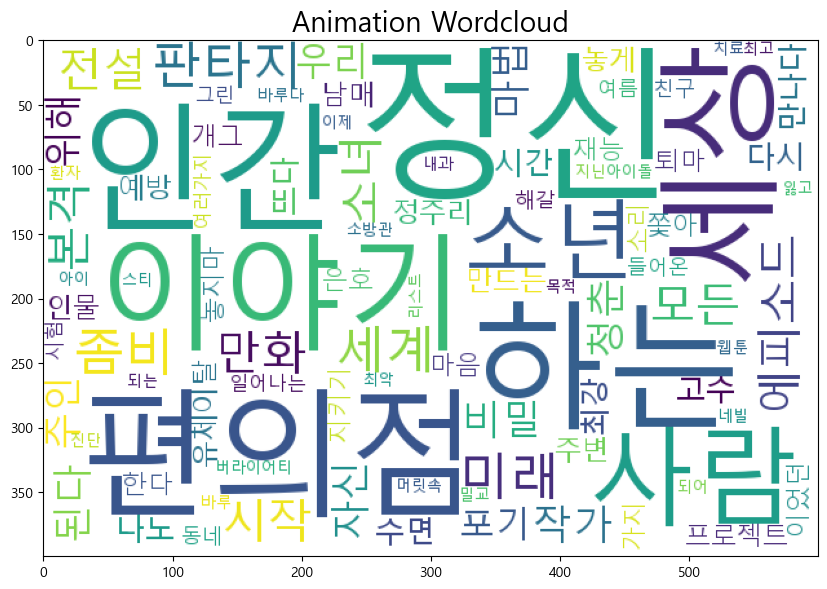

In [190]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=600, height=400, \
                      min_font_size=10, max_words=500, collocations=False, 
                      font_path='malgun',
                      min_word_length=2)#, colormap="Greens")

wordcloud.generate(" ".join(ani_corpus))

plt.figure(figsize=(10, 10))
plt.title("Animation Wordcloud",fontsize=20)
plt.imshow(wordcloud)
plt.show()

Animation은 편의점, 인간, 이야기, 사람, 세상, 정신, 좀비, 세계, 판타지, 만화, 세계, 미래, 작가, 소년, 에피소드 등이 눈에 띄는 키워드입니다. 판타지, 드라마, 로맨스, 개그의 비중이 높기 때문에 등장하는 키워드라고 생각할 수 있습니다. 

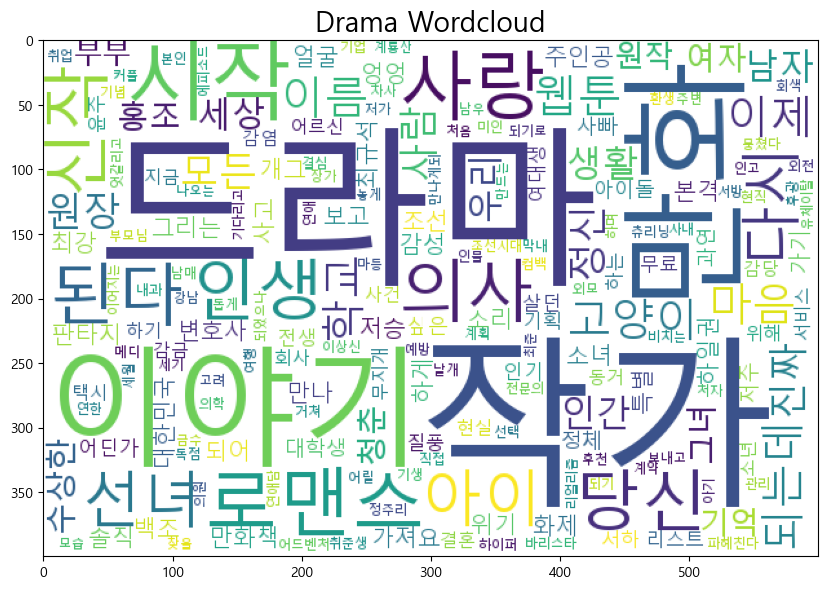

In [189]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=600, height=400, \
                      min_font_size=10, max_words=500, collocations=False, 
                      font_path='malgun',
                      min_word_length=2)#, colormap="Greens")

wordcloud.generate(" ".join(drama_corpus))

plt.figure(figsize=(10, 10))
plt.title("Drama Wordcloud",fontsize=20)
plt.imshow(wordcloud)
plt.show()

드라마는 장르로서의 드라마, 이야기, 자각, 만화, 로맨스, 사랑, 아이, 당신, 의사, 사랑, 고양이, 시작, 선녀, 아이 등의 키워드가 많은데, 이는 로맨스와 장르로서의 드라마, 인간의 일상적인 다양한 이야기를 다루는 휴먼스토리의 이야기들이 많이 드라마화되는 경향을 잘 반영한다고 볼 수 있습니다.

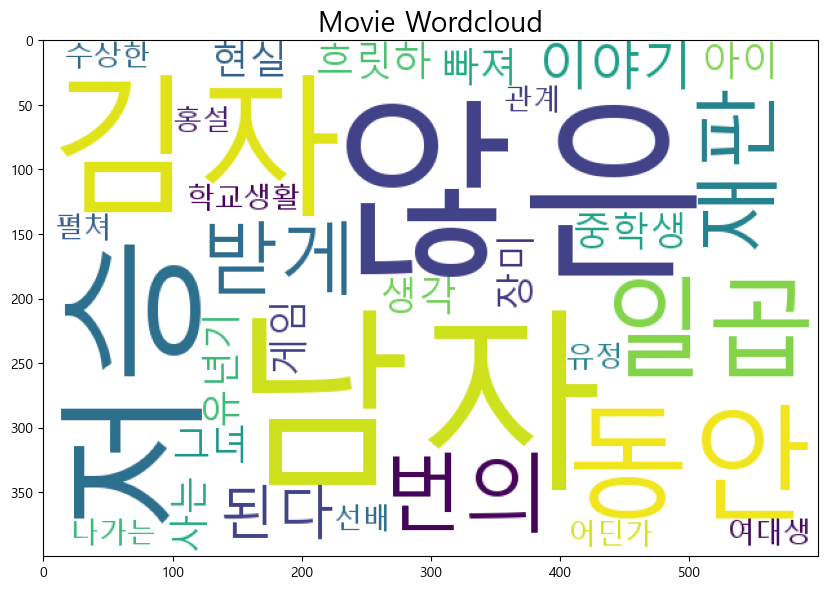

In [188]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=600, height=400, \
                      min_font_size=10, max_words=500, collocations=False, 
                      font_path='malgun',
                      min_word_length=2)#, colormap="Greens")

wordcloud.generate(" ".join(movie_corpus))

plt.figure(figsize=(10, 10))
plt.title("Movie Wordcloud",fontsize=20)
plt.imshow(wordcloud)
plt.show()

In [196]:
df_m[df_m['media']=='movie']

,id,title,author,genre,description,rating,date,completed,age,free,link,media,media_title,open(공개여부),genre1,genre2
1011,697685,신과함께,주호민,"스토리, 판타지",나쁘지도 착하지도 않은 평범한 남자 김자홍이저승에서 49일 동안 일곱 번의 재판을 ...,9.98,2019.01.16 23:01,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...,movie,신과 함께 죄와 벌,Y,스토리,판타지
1012,697685,신과함께,주호민,"스토리, 판타지",나쁘지도 착하지도 않은 평범한 남자 김자홍이저승에서 49일 동안 일곱 번의 재판을 ...,9.98,2019.01.16 23:01,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...,movie,신과 함께 인과 연,Y,스토리,판타지
1082,570502,아이들은 즐겁다,허5파6,"스토리, 드라마",흐릿하지만 섬세했던 유년기담담한 아이들의 이야기.,9.96,2014.05.26 23:11,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=5...,movie,아이들은 즐겁다,Y,스토리,드라마
1207,647946,여중생A,허5파6,"스토리, 드라마",게임에 빠져 사는 중학생 장미래.생각 많고 내향적인 그녀의 현실 속 학교생활.,9.98,2017.06.25 23:19,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...,movie,여중생A,Y,스토리,드라마
2105,720121,치즈인더트랩,순끼,"스토리, 로맨스","평범한 여대생 홍설, 그리고 어딘가 수상한 선배 유정.미묘한 관계의 이들이 펼쳐나가...",9.98,2019.12.20,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...,movie,치즈인더트랩,Y,스토리,로맨스


영화는 남자, 저승, 김자, 동안, 일곱, 장미, 중학생, 재판의 키워드가 있는데,이는 모두 영화 신과함께의 키워드임을 알 수 있습니다. 아이들은 즐겁다, 여중생A, 치즈인더트랩과는 다르게 신과 함께는 description이 2번 중복해서 들어가고 movie에 속한 데이터의 숫자가 적어서 과대평가되어 있음을 알 수 있습니다.
&nbsp;  
## 6.4. KNN to predict Potential Media  
6.2에서와 같이 다양한 input variables로 해당 작품이 어떤 Media에 쓰였는지 아니면 쓰인게 아닌지를 판별하는 문제도 중요합니다. 하지만 콘텐츠 제작자의 입장에서 생각해 볼 때 더 중요한 문제는 해당 웹툰을 가지고 어떤 매체로 변환할지, 즉 드라마, 영화, 애니메이션 중에서 어떤 미디어를 선택해야할 지를 선택하는 문제는 중요할 수 있습니다. 따라서 6.4에서는 KNN을 이용해 해당 작품의 features를 활용하여 어떤 media로 변환하면 좋을지를 예측하는 작업을 수행하겠습니다.

In [169]:
# extract indices of media mix

X_media = X[df_m.index.to_numpy()]
y_media = y[df_m.index.to_numpy()]
#X_train_media, X_test_media, y_train_media, y_test_media = train_test_split(X_media, y_media, 
#                                                                            test_size=0.2, 
#                                                                            random_state=160225)
X_media.shape

(85, 203)

In [168]:
X_not_media = X[df_n.index.to_numpy()]
y_not_media = y[df_n.index.to_numpy()]
X_not_media.shape

(2028, 203)

In [170]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_media, y_media)

KNeighborsClassifier(n_neighbors=3)

In [175]:
y_pred_knnc = neigh.predict(X_not_media)
y_pred_knnc[0:10]

array([2, 1, 1, 2, 1, 2, 1, 1, 2, 2], dtype=int64)

In [178]:
media_int_to_label

{0: 'no media', 1: 'animation', 2: 'drama', 3: 'movie'}

In [179]:
y_pred_labels = []
for label_int in y_pred_knnc:
    y_pred_labels.append(media_int_to_label[label_int])
y_pred_labels[0:10]

['drama',
 'animation',
 'animation',
 'drama',
 'animation',
 'drama',
 'animation',
 'animation',
 'drama',
 'drama']

In [197]:
df_n_pred = df_n[['id','title','author','genre','description']]
df_n_pred['media_pred'] = y_pred_labels
df_n_pred

C:\Users\Tae Han Kim\AppData\Local\Temp\ipykernel_11760\1958519020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n_pred['media_pred'] = y_pred_labels


,id,title,author,genre,description,media_pred
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,drama
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,animation
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,animation
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",drama
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",animation
...,...,...,...,...,...,...
2094,784890,7아이언,태발 / 김홍태,"스토리, 드라마","사고로 오른손을 잃은 골프천재 주아이, 절망하는 시간조차 아깝다!아이는 프로가 되기...",drama
2095,703856,8월의 눈보라,김리아,"스토리, 로맨스",교복모델이었던 보라는 암흑 고3 시절을 거치며 이전의 모습은 온데간데 없다.설상가상...,drama
2096,792651,99강화나무몽둥이,홍실 / 지페리,"스토리, 판타지",약육강식이 진리인 가상 현실 게임 '크로노 라이프'.허접이라며 무시만 당하던 '나'...,animation
2097,737831,9등급 뒤집기,아백,"스토리, 드라마",한번호로 찍어도 받기힘들다는 9등급을 받는 이인범공부를 못한다는 이유로 온갖 괄시를...,drama


In [199]:
df_n_pred.iloc[0:10]

,id,title,author,genre,description,media_pred
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,drama
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,animation
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,animation
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",drama
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",animation
5,729963,가슴털 로망스,갸오오,"스토리, 개그",최고의 상남자가 되기 위한 여행을 떠나는 장호풍과 친구들명언범벅 눈물범벅 의리범벅 ...,drama
6,799793,가우스전자,곽백수,"에피소드, 일상",다국적 문어발 기업 가우스전자 마케팅3부 이야기곽백수 작가가 선보이는 본격 직장인 만화!,animation
7,790239,가족같은 XX,서우현,"스토리, 로맨스",탑 배우 한나나는 우연히 갈 곳 없는 고등학생 유성우를 집에 들인다.아슬아슬한 동거...,animation
8,753385,가족의 초상,김승택,"에피소드, 드라마","할머니의 죽음과 그로 인한 가족들의 변화를 겪어 나가면서, 당연하게만 생각했던 가족...",drama
9,788167,가짜 동맹,케냠,"스토리, 로맨스",소꿉친구와 하루아침에 커플이 되었다?!통제가 강한 부모님들을 안심 시키고 자유롭게 ...,drama


KNN을 통해 예측한 내용을 살펴보겠습니다. 가난을 들에 업은 소녀의 경우 장르는 스토리, 로맨스이며 재벌과 가난한 여자주인공이 나오는 전형적인 신데렐라 스토리로 드라마에 적합한 장르입니다. 가담항설은 동양판타지의 스토리, 판타지 작품으로 앞선 EDA에서 살펴본 바에 의하면 애니메이션에 가장 적합한데 실제로도 그런 결과를 도출하였습니다. 가령의 정체불명 이야기는 미스터리한 이야기로 추정되는데 애니메이션으로, 가비지타임은 스포츠로 드라마, 가상&RPG는 판타지로 애니메이션, 가슴털 로망스는 개그물로 드라마, 가우스전자는 일상을 다룬 작품으로 애니메이션, 가족같은 XX는 로맨스로 애니메이션, 가족의 초상은 드라마로 드라마, 가짜 동맹은 로맨스로 드라마화로 예측하였는데, 스포츠물을 드라마로 도출한 결과 빼고는 앞선 EDA와 Wordcloud를 통하여 모두 납득이 가는 결과입니다. 물론, 실제로는 스포츠를 주제로 하여 흥행한 라켓소년단, 스물다섯 스물하나, 스토브리그 등의 작품이 있으나 이는 외부 지식이며 해당 알고리즘으로는 도출하기 어려운 결과로 보입니다.

In [200]:
df_n_pred.iloc[100:110]

,id,title,author,genre,description,media_pred
103,800007,관계중독,오얏,"스토리, 스릴러",잘나가는 것에 대한 환상을 품고 있던 평범한 여고생 '설단아'는 우연히 노는 아이들...,drama
104,791255,관심종자,웅,"스토리, 액션",싸움이라곤 쥐뿔 관심 없는.. 그저 실수 하나 때문에 일진에게 제대로 찍혀버려 괴롭...,animation
105,774088,관종교장,좌승훈,"스토리, 개그",전 재산을 가족 몰래 주식으로 날린 교장 정도만. 이제 은퇴까지 1년 밖에 남지 않...,drama
106,784835,관찰일기,파랑,"스토리, 로맨스",지언은 우연히 같은 과 동기인 연성을 수업에서 마주치게 된다.같은 과지만 처음 보는...,animation
107,776601,광마회귀,JP / 이히 / 유진성,"스토리, 무협/사극",무공에 미친 광마 이자하.그는 마교 교주의 천옥을 훔쳐 쫓기던 중 벼랑에서 떨어지게...,animation
108,753509,광장,오세형 / 김균태,"스토리, 액션",‘군계일학’ 정점에서 조직을 떠난 기준.15년만에홀로 복귀한다.,animation
109,750582,광해의 연인,러시 / 유오디아,"스토리, 로맨스","“내가 그랬지, 널 기억하겠다고.”2020년 대한민국. 집안 대대로 시간 여행자라는...",animation
110,765158,괴물공작의 딸,한바다 / 찬란,"스토리, 판타지","세상과 단절되어 살아가던 나는 '괴물공작' 이라 불리는 아빠에게 거둬졌다.어느 날,...",movie
111,728751,괴물신부,상범 / 스테익,"스토리, 판타지",어느날 해나에게 찾아와 신랑으로 삼아달라는 꽃미남들.그들에게는 엄청난 비밀이 있었다!?,animation
112,792949,괴이,이정우 / 홍인근,"스토리, 액션","사이좋은 소꿉친구였던 승환, 도희, 상민은 고등학생이 되어서도 끈끈한 우정을 이어가...",animation


10개의 작품 모두 납득할만한 media를 제시했다고 볼 수 있습니다. 관계중독과 관종교장은 각각 스릴러, 개그물로 드라마에 적합한 소재입니다. 괴물공작의 딸의 경우 판타지인데 영화로 예측한 점이 특이할만한 사항입니다. 다른 작품들의 경우 로맨스, 무협/사극, 액션, 로맨스, 판타지인데 모두 애니메이션에 적합한 장르들입니다.

# 6. Hugging Face Pre-Trained Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#pd.set_option('display.width', 600) 
path = os.getcwd()
data_path = os.path.join(path, 'naver_webtoon_nlp')

In [2]:
df_input = pd.read_csv(os.path.join(data_path, 'naver_media_mix_merged_input_xy.csv'))
df_m = pd.read_csv(os.path.join(data_path, 'naver_media_mix_merged_with_media.csv'))
df_n = pd.read_csv(os.path.join(data_path, 'naver_media_mix_merged_without_media.csv'))

In [3]:
x_text = df_input['text'].to_numpy()
x_ages = df_input['age'].to_numpy()
y_label = df_input['media_label'].to_numpy()

n_x = len(x_ages)
X = x_ages.reshape(n_x,-1)

## 6.1. RoBERTa by KLUE  
KLUE 논문의 RoBERTa large model을 pre-trained model로 선정.

In [5]:
from transformers import AutoModel, AutoTokenizer
#NOTE: Use BertTokenizer instead of RobertaTokenizer. (AutoTokenizer will load BertTokenizer)

model = AutoModel.from_pretrained("klue/roberta-large")
tokenizer = AutoTokenizer.from_pretrained("klue/roberta-large")

Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it f

In [6]:
model

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(32000, 1024, padding_idx=1)
    (position_embeddings): Embedding(514, 1024, padding_idx=1)
    (token_type_embeddings): Embedding(1, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (d

In [7]:
model.embeddings.word_embeddings

Embedding(32000, 1024, padding_idx=1)

In [8]:
model.embeddings.word_embeddings.weight

Parameter containing:
tensor([[-2.4841e-02,  9.0714e-03, -1.7334e-02,  ...,  8.4900e-02,
         -6.3057e-03, -1.1841e-02],
        [-2.1957e-02,  2.0233e-02, -6.1340e-02,  ...,  5.7220e-03,
          1.5762e-02, -2.9282e-02],
        [-4.9835e-02, -3.4153e-05,  3.8330e-02,  ..., -4.5502e-02,
          4.6997e-02, -6.9336e-02],
        ...,
        [-3.2074e-02,  1.2573e-02,  2.1057e-02,  ...,  1.0730e-01,
          3.8910e-03, -1.2604e-02],
        [-5.2917e-02,  1.7151e-02, -1.5160e-02,  ...,  1.0449e-01,
          1.5823e-02, -4.1412e-02],
        [-1.0818e-02,  1.3573e-02,  1.0429e-02,  ...,  1.1719e-01,
         -1.0328e-03, -8.3694e-03]], requires_grad=True)

In [14]:
x_text[0:2]

array(['흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 다세포소녀의 웹툰판!',
       '이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타지 소년만화'],
      dtype=object)

In [15]:
seq = x_text[0:2].tolist()
model_inputs = tokenizer(seq, padding='max_length',return_tensors="pt")
model_inputs['input_ids']

tensor([[    0, 15136,  2220,  ...,     1,     1,     1],
        [    0,  3686,  5093,  ...,     1,     1,     1]])

In [19]:
output = model(model_inputs['input_ids'])
last_hidden_states = output['last_hidden_state']


In [20]:
print(last_hidden_states.shape)
# CLS Token Embeddings
print(last_hidden_states[:, 0, :])

torch.Size([2, 512, 1024])
tensor([[-0.4184, -0.1272, -0.6316,  ..., -0.2411, -0.3451, -0.1044],
        [-0.4535, -0.0848, -0.6025,  ..., -0.1992, -0.3228, -0.1282]],
       grad_fn=<SliceBackward0>)


In [4]:
'''
참조
https://teddylee777.github.io/huggingface/bert-kor-text-classification/
'''
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModel, AutoTokenizer

class TokenDataset(object):
    def __init__(self, raw_texts, y_labels, *ages):
        # texts and corresponding y_labels
        self.texts = raw_texts.tolist()
        self.y_labels = y_labels
        # Tokenizer
        self.tokenizer = AutoTokenizer.from_pretrained("klue/roberta-large")
        self.ages = ages[0]
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        sentence = self.texts[idx]
        label = self.y_labels[idx]
        age = self.ages[idx]
        
        # 토큰화 처리
        tokens = self.tokenizer(
            sentence,                # 1개 문장 
            return_tensors='pt',     # 텐서로 반환
            truncation=True,         # 잘라내기 적용
            padding='max_length',    # 패딩 적용
            add_special_tokens=True  # 스페셜 토큰 적용
        )
        
        input_ids = tokens['input_ids'].squeeze(0)           # 2D -> 1D
        attention_mask = tokens['attention_mask'].squeeze(0) # 2D -> 1D
        token_type_ids = torch.zeros_like(attention_mask)
        ages = torch.DoubleTensor(age).squeeze(0)
        
        # input_ids, attention_mask, token_type_ids 이렇게 3가지 요소를 반환하도록 합니다.
        # input_ids: 토큰
        # attention_mask: 실제 단어가 존재하면 1, 패딩이면 0 (패딩은 0이 아닐 수 있습니다)
        # token_type_ids: 문장을 구분하는 id. 단일 문장인 경우에는 전부 0
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask, 
            'token_type_ids': token_type_ids,
            'ages': ages
        }, torch.tensor(label)

## 6.2. Genre 1과 Genre 2의 Token 처리
genre 1과 2의 경우 문장이 아닌 개별 단어이므로 embedding weight로 불러와서 사용을 시도했습니다. weight를 인덱싱으로 직접 불러오는 경우에도 정상적으로 weights 업데이트가 되기 때문입니다.

In [5]:
genre1_int_to_label = {0: '스토리', 1: '옴니버스', 2: '에피소드'}

genre2_int_to_label = {0: '로맨스', 1: '판타지', 2: '드라마', 
                     3: '스포츠', 4: '개그', 5: '일상', 
                     6: '스릴러', 7: '액션', 8: '감성', 
                     9: '무협/사극'}

In [7]:
tokenizer(['스토리'])

{'input_ids': [[0, 6354, 2]], 'token_type_ids': [[0, 0, 0]], 'attention_mask': [[1, 1, 1]]}

In [77]:
tokenizer.convert_ids_to_tokens(tokenizer('스토리')['input_ids'])

['[CLS]', '스토리', '[SEP]']

In [78]:
classroberta.roberta.embeddings.word_embeddings.weight[6354]

tensor([-0.0657, -0.0128, -0.0254,  ..., -0.0157, -0.0152, -0.0127])

In [79]:
tokenizer.convert_ids_to_tokens(tokenizer('옴니버스')['input_ids'])

['[CLS]', '옴니', '##버스', '[SEP]']

단어 '스토리'의 경우 하나의 token이라서 바로 embedding을 lookup으로 불러와서 사용할 수 있습니다. 하지만 '옴니버스'처럼 두 token으로 쪼개지는 경우 token의 앞뒤가 분명하게 존재하기 때문에 단순하게 word embedding만 사용하지 않고, position도 고려해야합니다. 따라서, genre1과 genre2의 개별 단어들의 word embedding만 사용하려는 방법 대신 decription의 맨 앞에 '이 웹툰의 장르는 genre1, genre2'입니다를 추가하여 사용하는 방법을 고안하고 적용합니다.

In [5]:
df = pd.read_csv(os.path.join(data_path, 'naver_media_mix_merged.csv'))
genre_text = df['genre'].to_numpy()
genre_text[0:5]

array(['스토리, 로맨스', '스토리, 판타지', '옴니버스, 드라마', '스토리, 스포츠', '스토리, 판타지'],
      dtype=object)

In [6]:
texts = []
for idx, t in enumerate(x_text):
    add_text = '이 웹툰의 장르는 '+genre_text[idx]+'입니다. '
    temp_text = add_text + t
    texts.append(temp_text)
texts[0:5]

['이 웹툰의 장르는 스토리, 로맨스입니다. 흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 다세포소녀의 웹툰판!',
 '이 웹툰의 장르는 스토리, 판타지입니다. 이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타지 소년만화',
 '이 웹툰의 장르는 옴니버스, 드라마입니다. 어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이 연기처럼 사라지기 시작했다. 판타지보다 비현실적인 우리의 회색빛 이야기.',
 '이 웹툰의 장르는 스토리, 스포츠입니다. 한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?',
 '이 웹툰의 장르는 스토리, 판타지입니다. "사람은 좀 죽여도 싸우는건 싫어해요." 게임에서조차 집 바깥을 나가지 않는 \'제리\'. 전투는 한 번도 안해봤는데, 에픽 무기가 귀속되었다? 가상현실 액션 RPG 모브사가 온라인. 그 고인물들의 군상극.']

In [7]:
x_text = texts
del(texts)
x_text = np.array(x_text)
x_text[0:5]

array(['이 웹툰의 장르는 스토리, 로맨스입니다. 흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 다세포소녀의 웹툰판!',
       '이 웹툰의 장르는 스토리, 판타지입니다. 이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타지 소년만화',
       '이 웹툰의 장르는 옴니버스, 드라마입니다. 어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이 연기처럼 사라지기 시작했다. 판타지보다 비현실적인 우리의 회색빛 이야기.',
       '이 웹툰의 장르는 스토리, 스포츠입니다. 한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?',
       '이 웹툰의 장르는 스토리, 판타지입니다. "사람은 좀 죽여도 싸우는건 싫어해요." 게임에서조차 집 바깥을 나가지 않는 \'제리\'. 전투는 한 번도 안해봤는데, 에픽 무기가 귀속되었다? 가상현실 액션 RPG 모브사가 온라인. 그 고인물들의 군상극.'],
      dtype='<U636')

## 6.3. Split Data into Train and Test

In [8]:
from sklearn.model_selection import train_test_split
numbers = np.array(range(len(X)))
train_idx, test_idx = train_test_split(numbers, test_size=0.2, random_state=160225)
train_idx.shape

(1690,)

In [9]:
# description
text_train = x_text[train_idx]
text_test= x_text[test_idx]
# ages
X_train = X[train_idx]
X_test = X[test_idx]
# label, media
y_train = y_label[train_idx]
y_test = y_label[test_idx]

In [10]:
# train, test 데이터셋 생성
train_data = TokenDataset(text_train, y_train, X_train)
test_data = TokenDataset(text_test, y_test, X_test)

# DataLoader로 이전에 생성한 Dataset를 지정하여, batch 구성, shuffle, num_workers 등을 설정합니다.
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

## 6.4. Define ClassifyRoBERTa and Following Functions  
전체적 코드는 [이 웹페이지](https://teddylee777.github.io/huggingface/bert-kor-text-classification/)를 참조하여 수정했습니다.

In [11]:
class ClassifyBert(nn.Module):
    def __init__(self, dropout_rate=0.3, n_labels=2):
        super(ClassifyBert, self).__init__()
        # pre-trained model
        self.roberta = AutoModel.from_pretrained("klue/roberta-large")
        # Freeze the RoBERTa
        for param in self.roberta.parameters():
             param.requires_grad = False
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc = nn.Linear(1025, n_labels)
    
    def forward(self, input_ids, attention_mask, token_type_ids, ages):
        # text의 경우 웹툰에 대한 description으로 문장이기 때문에
        # 입력을 pre-trained bert model 로 대입
        output = self.roberta(input_ids=input_ids, attention_mask=attention_mask, 
                              token_type_ids=token_type_ids)
        # 결과의 last_hidden_state 가져옴
        last_hidden_state = output['last_hidden_state']
        # last_hidden_state[:, 0, :]는 [CLS] 토큰을 가져옴
        # 해당 sentence의 대표 token
        x = self.dropout(last_hidden_state[:, 0, :])
        #print('x shape',x.shape)
        #print('age shape',ages.shape)
        ages = ages.unsqueeze(1)
        #print('ages type',ages.type())
        ages = ages.type(torch.FloatTensor)
        x = torch.cat((x, ages),dim=1)
        # FC 을 거쳐 최종 출력
        x = self.fc(x)
        return x

In [12]:
n_y = len(np.unique(y_label))
n_y

4

In [13]:
classroberta = ClassifyBert(n_labels=n_y)

Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it f

In [14]:
classroberta

ClassifyBert(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): La

In [16]:
# loss 정의: CrossEntropyLoss
loss_fn = nn.CrossEntropyLoss()

# 옵티마이저 정의: bert.paramters()와 learning_rate 설정
optimizer = torch.optim.Adam(classroberta.parameters(), lr=1e-3)

In [17]:
from tqdm import tqdm  # Progress Bar 출력

def model_train(model, data_loader, loss_fn, optimizer, device):
    # 모델을 훈련모드로 설정합니다. training mode 일 때 Gradient 가 업데이트 됩니다. 반드시 train()으로 모드 변경을 해야 합니다.
    model.train()
    
    # loss와 accuracy 계산을 위한 임시 변수 입니다. 0으로 초기화합니다.
    running_loss = 0
    corr = 0
    counts = 0
    
    # 예쁘게 Progress Bar를 출력하면서 훈련 상태를 모니터링 하기 위하여 tqdm으로 래핑합니다.
    prograss_bar = tqdm(data_loader, unit='batch', total=len(data_loader), mininterval=1)
    
    # mini-batch 학습을 시작합니다.
    for idx, (inputs, labels) in enumerate(prograss_bar):
        # inputs, label 데이터를 device 에 올립니다. (cuda:0 혹은 cpu)
        inputs = {k:v.to(device) for k, v in inputs.items()}
        #print(inputs)
        labels = labels.to(device)
        
        # 누적 Gradient를 초기화 합니다.
        optimizer.zero_grad()
        
        # Forward Propagation을 진행하여 결과를 얻습니다.
        output = model(**inputs)
        
        # 손실함수에 output, label 값을 대입하여 손실을 계산합니다.
        loss = loss_fn(output, labels)
        
        # 오차역전파(Back Propagation)을 진행하여 미분 값을 계산합니다.
        loss.backward()
        
        # 계산된 Gradient를 업데이트 합니다.
        optimizer.step()
        
        # output의 max(dim=1)은 max probability와 max index를 반환합니다.
        # max probability는 무시하고, max index는 pred에 저장하여 label 값과 대조하여 정확도를 도출합니다.
        _, pred = output.max(dim=1)
        
        # pred.eq(lbl).sum() 은 정확히 맞춘 label의 합계를 계산합니다. item()은 tensor에서 값을 추출합니다.
        # 합계는 corr 변수에 누적합니다.
        corr += pred.eq(labels).sum().item()
        counts += len(labels)
        
        # loss 값은 1개 배치의 평균 손실(loss) 입니다. img.size(0)은 배치사이즈(batch size) 입니다.
        # loss 와 img.size(0)를 곱하면 1개 배치의 전체 loss가 계산됩니다.
        # 이를 누적한 뒤 Epoch 종료시 전체 데이터셋의 개수로 나누어 평균 loss를 산출합니다.
        running_loss += loss.item() * labels.size(0)
        
        # 프로그레스바에 학습 상황 업데이트
        prograss_bar.set_description(f"training loss: {running_loss/(idx+1):.5f}, training accuracy: {corr / counts:.5f}")
        
    # 누적된 정답수를 전체 개수로 나누어 주면 정확도가 산출됩니다.
    acc = corr / len(data_loader.dataset)
    
    # 평균 손실(loss)과 정확도를 반환합니다.
    # train_loss, train_acc
    return running_loss / len(data_loader.dataset), acc

In [18]:
def model_evaluate(model, data_loader, loss_fn, device):
    # model.eval()은 모델을 평가모드로 설정을 바꾸어 줍니다. 
    # dropout과 같은 layer의 역할 변경을 위하여 evaluation 진행시 꼭 필요한 절차 입니다.
    model.eval()
    
    # Gradient가 업데이트 되는 것을 방지 하기 위하여 반드시 필요합니다.
    with torch.no_grad():
        # loss와 accuracy 계산을 위한 임시 변수 입니다. 0으로 초기화합니다.
        corr = 0
        running_loss = 0
        
        # 배치별 evaluation을 진행합니다.
        for inputs, labels in data_loader:
            # inputs, label 데이터를 device 에 올립니다. (cuda:0 혹은 cpu)
            inputs = {k:v.to(device) for k, v in inputs.items()}
            labels = labels.to(device)
            
            # 모델에 Forward Propagation을 하여 결과를 도출합니다.
            output = model(**inputs)
            
            # output의 max(dim=1)은 max probability와 max index를 반환합니다.
            # max probability는 무시하고, max index는 pred에 저장하여 label 값과 대조하여 정확도를 도출합니다.
            _, pred = output.max(dim=1)
            
            # pred.eq(lbl).sum() 은 정확히 맞춘 label의 합계를 계산합니다. item()은 tensor에서 값을 추출합니다.
            # 합계는 corr 변수에 누적합니다.
            corr += torch.sum(pred.eq(labels)).item()
            
            # loss 값은 1개 배치의 평균 손실(loss) 입니다. img.size(0)은 배치사이즈(batch size) 입니다.
            # loss 와 img.size(0)를 곱하면 1개 배치의 전체 loss가 계산됩니다.
            # 이를 누적한 뒤 Epoch 종료시 전체 데이터셋의 개수로 나누어 평균 loss를 산출합니다.
            running_loss += loss_fn(output, labels).item() * labels.size(0)
        
        # validation 정확도를 계산합니다.
        # 누적한 정답숫자를 전체 데이터셋의 숫자로 나누어 최종 accuracy를 산출합니다.
        acc = corr / len(data_loader.dataset)
        
        # 결과를 반환합니다.
        # val_loss, val_acc
        return running_loss / len(data_loader.dataset), acc

## 6.5. Train the Model

In [19]:
# 최대 Epoch을 지정합니다.
num_epochs = 4

train_loss_list = []
val_loss_list = []

# checkpoint로 저장할 모델의 이름을 정의 합니다.
model_name = 'klue-roberta-large'#'bert-kor-base'

min_loss = np.inf

device = 'cpu'

# Epoch 별 훈련 및 검증을 수행합니다.
for epoch in range(num_epochs):
    # Model Training
    # 훈련 손실과 정확도를 반환 받습니다.
    train_loss, train_acc = model_train(classroberta, train_loader, loss_fn, optimizer, device)
    train_loss_list.append(train_loss)
    # 검증 손실과 검증 정확도를 반환 받습니다.
    val_loss, val_acc = model_evaluate(classroberta, test_loader, loss_fn, device)   
    val_loss_list.append(val_loss)
    # val_loss 가 개선되었다면 min_loss를 갱신하고 model의 가중치(weights)를 저장합니다.
    if val_loss < min_loss:
        print(f'[INFO] val_loss has been improved from {min_loss:.5f} to {val_loss:.5f}. Saving Model!')
        min_loss = val_loss
        torch.save(classroberta.state_dict(), os.path.join(data_path,f'{model_name}.pth'))
    
    # Epoch 별 결과를 출력합니다.
    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f}')

training loss: 22.76772, training accuracy: 0.89586: 100%|███████████████████████| 27/27 [1:45:59<00:00, 235.53s/batch]


[INFO] val_loss has been improved from inf to 0.38393. Saving Model!
epoch 01, loss: 0.36374, acc: 0.89586, val_loss: 0.38393, val_accuracy: 0.93853


training loss: 12.91132, training accuracy: 0.96509: 100%|███████████████████████| 27/27 [1:46:49<00:00, 237.39s/batch]


[INFO] val_loss has been improved from 0.38393 to 0.34084. Saving Model!
epoch 02, loss: 0.20628, acc: 0.96509, val_loss: 0.34084, val_accuracy: 0.93853


training loss: 11.38205, training accuracy: 0.96509: 100%|███████████████████████| 27/27 [1:46:46<00:00, 237.27s/batch]


[INFO] val_loss has been improved from 0.34084 to 0.30275. Saving Model!
epoch 03, loss: 0.18184, acc: 0.96509, val_loss: 0.30275, val_accuracy: 0.93853


training loss: 11.55365, training accuracy: 0.96509: 100%|███████████████████████| 27/27 [1:46:13<00:00, 236.07s/batch]


epoch 04, loss: 0.18458, acc: 0.96509, val_loss: 0.30555, val_accuracy: 0.93853


Text(0.5, 1.0, 'validation loss')

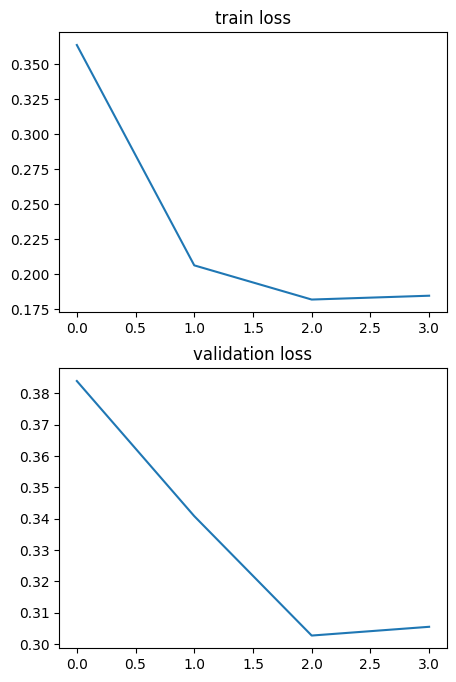

In [20]:
figure, axis = plt.subplots(2, 1, figsize=(5, 8))

xaxis_values = list(range(num_epochs))
axis[0].plot(xaxis_values,train_loss_list) 
axis[0].set_title('train loss')
axis[1].plot(xaxis_values, val_loss_list) 
axis[1].set_title('validation loss')

## 6.6. Model Analysis  
앞서 SVM을 이용한 media classificaiotn의 성능이 validaiton accuracy에서 약 0.87인데 반해, Pre-trained KLUE-RoBERTa를 이용한 transfer learning으로 구현한 classification의 성능은 validaiton accuracy가 약 0.94임을 알 수 있습니다. 따라서, transfer learning을 이용한 모델의 개발은 상당히 편리하고 기존 ML 방식보다 좋은 성능을 가져올 수 있는 방법임을 확인할 수 있습니다.

# 7. Topic Modeling  
주어진 genre에 대한 정보 없이 description만으로 장르에 따른 unsupervised clustering을 토픽 모델링으로 수행해보고 genre 별로 잘 분류되는지 확인하고자 합니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#pd.set_option('display.width', 600) 
path = os.getcwd()
data_path = os.path.join(path, 'naver_webtoon_nlp')
df = pd.read_csv(os.path.join(data_path, 'naver_media_mix_merged.csv'))
df_input = pd.read_csv(os.path.join(data_path, 'naver_media_mix_merged_input_xy.csv'))
df_m = pd.read_csv(os.path.join(data_path, 'naver_media_mix_merged_with_media.csv'))
df_n = pd.read_csv(os.path.join(data_path, 'naver_media_mix_merged_without_media.csv'))
x_text = df_input['text'].to_numpy()
x_ages = df_input['age'].to_numpy()
y_label = df_input['media_label'].to_numpy()

n_x = len(x_ages)
X = x_ages.reshape(n_x,-1)


C:\Users\Tae Han Kim\.conda\envs\recsys\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Tae Han Kim\.conda\envs\recsys\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Tae Han Kim\.conda\envs\recsys\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 7.1. Pre-processing  
Extract Nouns, and Verbs and Remove stopwords

In [21]:
# Change raw texts into corpus with Nouns and Verbs
import time
from tqdm import tqdm
# konlpy tokenizer
from konlpy.tag import Okt
okt = Okt()

stopwords_kor = ['거기', '것', '그', '그것', '된','된다', '를', 
                 '여기', '을', '를', '하', '하기','하는','하다','한다']

def make_corpus_pos(texts):
    corpus_new = []
    for t in tqdm(texts):
        extracted = okt.pos(t)
        curr_corpus = []
        for token,p in extracted:
            if p in ('Noun','Verb') and token not in stopwords_kor:
                curr_corpus.append(token)
        corpus_new.append(curr_corpus)
        # only Noun, and Verb
    return corpus_new

start = time.time()
corpus_new = make_corpus_pos(x_text)
end = time.time()
dur = round((end-start)/60, 4)
print("corpus making finished======================")
print('Taken Time: {0}'.format(dur))


100%|█████████████████████████████████████████████████████████████████████████████| 2113/2113 [00:19<00:00, 109.85it/s]

corpus making finished======================
Taken Time: 0.3206


In [22]:
corpus_new[0:10]

[['하디',
  '재벌',
  '후계',
  '캔디',
  '울',
  '갈',
  '가난',
  '소녀',
  '파란만장',
  '인기',
  '작',
  '다세포',
  '소녀',
  '웹툰',
  '판'],
 ['이번',
  '주인공',
  '돌이',
  '돌이',
  '동료',
  '모으고',
  '악당',
  '물리',
  '친다',
  '또',
  '가표',
  '동양',
  '판타지',
  '소년만화'],
 ['날',
  '인어',
  '내게',
  '말',
  '걸어왔다',
  '눈',
  '떠보니',
  '총구',
  '몸',
  '연기',
  '사라지기',
  '시작',
  '했다',
  '판타지',
  '비현실적',
  '우리',
  '회색',
  '빛',
  '이야기'],
 ['한국',
  '최초',
  '한국',
  '고교',
  '스포츠',
  '웹툰',
  '열혈따윈',
  '개',
  '줘',
  '낙',
  '오자',
  '농구부',
  '운명'],
 ['사람',
  '좀',
  '죽여도',
  '싸우는건',
  '게임',
  '집',
  '바깥',
  '나가지',
  '않는',
  '제리',
  '전투',
  '한',
  '번',
  '해봤는데',
  '에픽',
  '무기',
  '귀속',
  '되었다',
  '가상현실',
  '액션',
  '모브사',
  '온라인',
  '인물',
  '군상'],
 ['최고',
  '상남자',
  '되기',
  '위',
  '여행',
  '떠나는',
  '장',
  '호풍',
  '친구',
  '명언',
  '범벅',
  '눈물',
  '범벅',
  '의리',
  '범벅',
  '개그',
  '만화'],
 ['다국적',
  '문어',
  '발',
  '기업',
  '가우스전자',
  '마케팅',
  '부',
  '이야기',
  '곽백수',
  '작가',
  '선보이는',
  '본격',
  '직장인',
  '만화'],
 ['탑',
  '배우',
  '한나나',
  '갈',
  '곳',
  '고

In [23]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
# 각 단어를 (단어id, 나온횟수) 로 바꾸는 작업
dictionary = Dictionary(corpus_new)

In [24]:
# https://sosoeasy.tistory.com/347
# corpus[i] : i번째 뉴스에서 나온단어들을 가지고 (단어id, 나온횟수)들을 저장한 list

corpus1 = [dictionary.doc2bow(text) for text in corpus_new]
corpus1[0:10]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1)],
 [(26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)],
 [(5, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2)],
 [(56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1)],
 [(80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 3),
  (87, 1),
  (88, 1),
  (89

## 7.2. Determine the Numeber of Topics  
Perplexity and Coherence  
### 7.2.1. Perplexity

In [25]:
# perperlexity to determine the numeber of topics
# Train LDA model.
from gensim.models import LdaModel

perp_list = []
# Set training parameters.
num_topics = 5
chunksize = 2000
passes = 20
iterations = 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

for i in range(2, 11):
    ldamodel = LdaModel(
                 corpus=corpus1,
                 id2word=id2word,
                 chunksize=chunksize,
                 alpha='auto',
                 eta='auto',
                 iterations=iterations,
                 num_topics=i,
                 passes=passes,
                 eval_every=eval_every
             )
    perp_list.append(ldamodel.log_perplexity(corpus1))


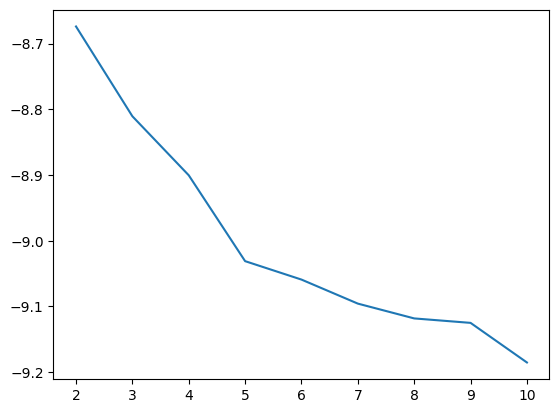

In [26]:
plt.plot(range(2,11),perp_list)

### 7.2.2. Coherence

In [27]:
from gensim.models import CoherenceModel

coherence_list = []
for i in range(2, 11):
    ldamodel = LdaModel(
                 corpus=corpus1,
                 id2word=id2word,
                 chunksize=chunksize,
                 alpha='auto',
                 eta='auto',
                 iterations=iterations,
                 num_topics=i,
                 passes=passes,
                 eval_every=eval_every
             )
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus_new,
                                        dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_list.append(coherence_lda)


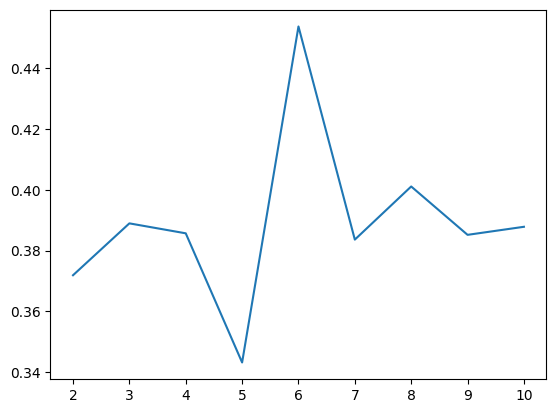

In [28]:
plt.plot(range(2,11),coherence_list)

## 7.3. Train LDA for Topic Modeling  
Determine the number of topics as 6.

In [29]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 6
chunksize = 2000
passes = 20
iterations = 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus1,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [42]:
topics = model.print_topics(num_words=20)
for topic in topics:
    print(topic)

(0, '0.009*"남자" + 0.006*"시작" + 0.006*"학교" + 0.005*"회사" + 0.005*"내" + 0.005*"집" + 0.005*"작가" + 0.005*"곳" + 0.005*"도움" + 0.005*"하룻밤" + 0.004*"펼쳐지는" + 0.004*"사랑" + 0.004*"위해" + 0.004*"날" + 0.004*"친구" + 0.004*"비밀" + 0.004*"사건" + 0.004*"의" + 0.004*"게임" + 0.004*"일상"')
(1, '0.012*"이야기" + 0.009*"볼" + 0.009*"수도" + 0.008*"작가" + 0.008*"아이" + 0.008*"웹툰" + 0.007*"가지" + 0.007*"의" + 0.007*"위해" + 0.007*"자신" + 0.007*"만화" + 0.006*"세계" + 0.006*"특집" + 0.006*"단편" + 0.006*"주인공" + 0.006*"공포" + 0.006*"사람" + 0.005*"등대" + 0.005*"프로" + 0.005*"강현수"')
(2, '0.013*"수" + 0.009*"사람" + 0.008*"소년" + 0.008*"한" + 0.007*"사랑" + 0.007*"시작" + 0.007*"알" + 0.006*"이" + 0.006*"세상" + 0.006*"할" + 0.006*"하나" + 0.005*"때" + 0.005*"소녀" + 0.005*"내" + 0.005*"이야기" + 0.005*"정체" + 0.005*"친구" + 0.005*"반" + 0.004*"하게" + 0.004*"해"')
(3, '0.012*"이야기" + 0.012*"수" + 0.007*"이" + 0.007*"공포" + 0.006*"최애캐" + 0.006*"당신" + 0.005*"사랑" + 0.005*"나" + 0.005*"로맨스" + 0.005*"그녀" + 0.004*"주인공" + 0.004*"시작" + 0.004*"매니저" + 0.004*"삶" + 0.004*"하며" + 0.004*"할" + 0

Topic 0는 남자, 시작, 학교, 회사, 집, 작가, 도움, 사랑, 친구, 비밀, 사건, 게임, 일상 등이 나오는 것으로 보아 일상적인 내용이 주를 이루는 주제로 유추할 수 있습니다. Topic 1에는 이야기, 수도, 작가, 아이, 웹툰, 자신, 특집, 단편, 공포, 등대, 프로 등이 나오는데 특정 주제를 유추하기는 힘듭니다. Topic 2에서는 소년, 사랑, 시작, 세상, 소녀, 이야기, 친구, 반 등이 나오는데 소년이 나오는 하이틴이나 청춘물일 가능성이 높습니다. Topic 3는 이야기, 공포, 최애캐, 당신, 사랑, 로맨스, 그녀, 주인공, 시작, 매니저, 삶, 연애가 나오는데 공포, 로맨스, 최애캐와 매니저를 보면 아이돌물 등의 여러 장르가 섞인 듯 합니다. Topic 4에서는 작가, 선, 단편, 전설, 이현세, 이두호, 만화, 시즌, 신인, 프로듀싱, 특집, 여대생, 명의 등이 나오는데 시즌제 웹툰이고 이현세, 이두호 등의 특정 인물이 나오는 작은 그룹일 확률이 큽니다. 또한 프로듀싱, 신인, 명의 등으로 미루어보아 특정 직업이 나오는 전문가물일 가능성이 높습니다. Topic 5에서는 이, 두, 여자, 시작, 세계, 자신, 돌아온, 찬, 결혼, 사람, 드라마, 남자, 부부 등이 나오는데 돌아온에서 회귀물일 가능성도 있고, 결혼에서 보아 로맨스나 로맨스 판타지 장르일 가능성도 있습니다.

In [48]:
df.iloc[0:5][['title','genre','description']]

,title,genre,description
0,가난을 등에 업은 소녀,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...
1,가담항설,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...
2,가령의 정체불명 이야기,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...
3,가비지타임,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?"
4,가상&RPG,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리..."


In [40]:
x_text[0:5]

array(['흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 다세포소녀의 웹툰판!',
       '이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타지 소년만화',
       '어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이 연기처럼 사라지기 시작했다. 판타지보다 비현실적인 우리의 회색빛 이야기.',
       '한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?',
       '"사람은 좀 죽여도 싸우는건 싫어해요." 게임에서조차 집 바깥을 나가지 않는 \'제리\'. 전투는 한 번도 안해봤는데, 에픽 무기가 귀속되었다? 가상현실 액션 RPG 모브사가 온라인. 그 고인물들의 군상극.'],
      dtype=object)

In [31]:
for i, topic_list in enumerate(model[corpus1]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.36128488), (2, 0.15210506), (3, 0.24538311), (5, 0.2325282)]
1 번째 문서의 topic 비율은 [(0, 0.5162946), (5, 0.46153075)]
2 번째 문서의 topic 비율은 [(1, 0.3489116), (3, 0.4699246), (5, 0.17019193)]
3 번째 문서의 topic 비율은 [(4, 0.2345966), (5, 0.7422947)]
4 번째 문서의 topic 비율은 [(0, 0.11585564), (5, 0.8710466)]


0번부터 4번까지의 문서를 살펴보면 0번 다세포소녀는 topic 0이 대다수이고 그 다음이 3, 5입니다. 원래 장르는 '스토리, 로맨스'이며 재벌후계자와 가난한 소녀라는 전형적인 현대 배경의 로맨스물인데 0번 토픽인 일상과 5번 topic의 로맨스로 미루어볼 때 적합한 분류임을 알 수 있습니다. 1번은 0과 5가 대부분임을 알 수 있습니다. 0번은 일상, 5번은 로맨스인데 원래 장르인 '스토리, 판타지'와는 잘 맞지 않음을 알 수 있습니다. 2번 문서는 가령의 정체불명 이야기로 '옴니버스, 드라마' 장르로 독특한 이야기를 많이 다루는데 다양한 장르인 토픽 1과 3이 높은 비중을 차지하는 것으로 볼 때 올바르게 추측되었음을 알 수 있습니다. 3번 문서는 '스토리, 스포츠' 장르의 웹툰으로 5번 토픽이 지배적으로 나머지는 4번이 2번째인데, 5번은 로맨스 비중이 높은 토픽인 만큼 적절하지 않으나 4번이 전문가물을 다루는 토픽이므로 약간은 그럴듯한 분류라고 생각할 수 있습니다. 4번 문서는 '스토리, 판타지' 장르로 0번과 5번 토픽이 대부분의 비중을 차지하는데 1번 문서와 마찬가지로 분류되어 있음을 알 수 있습니다. 이를 통해, '스토리, 판타지 장르'는 0번 토픽과 5번 토픽의 합으로 이루어질 확률이 높음을 유추해볼 수 있습니다.